In [2]:
import pandas as pd
import numpy as np
import os

os.getcwd()
ames_geo = pd.read_csv(r"C:\users\willf\OneDrive\Documents\NYDSA\Machine Learning Project\Machine Learning Project Proposal\ames_geo_final.csv", keep_default_na=False)

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [4]:
ames_geo.columns

Index(['Unnamed: 0', 'PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive

In [5]:
# Drop unknown, identifier, addresses, sale-price-related and one of highly correlated columns

ames_geo_mlprep = ames_geo.drop(columns=['Unnamed: 0', 'PID', 'Prop_Addr','LogSalePrice',  
                                         'TotRmsAbvGrd', 'NmbrBRs', 'FireplaceQu', 'GarageCond', 'PoolQC'])

ames_geo_mlprep.columns

Index(['GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'Scr

In [6]:
# Check data types
dtypes_df = ames_geo_mlprep.dtypes.reset_index()
dtypes_df.columns = ['Column', 'DataType']
dtypes_df.to_csv("dtypes_df.csv")

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split my dataset
X = ames_geo_mlprep.drop('SalePrice', axis=1)
y = ames_geo_mlprep['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# One-hot encode
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train.select_dtypes(include=['object']))
X_test_encoded = encoder.transform(X_test.select_dtypes(include=['object']))

# Convert back to DF
columns = encoder.get_feature_names_out(X_train.select_dtypes(include=['object']).columns)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=columns, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=columns, index = X_test.index)

# Merge back with numeric cols
X_train_final = pd.concat([X_train.select_dtypes(exclude=['object']), X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test.select_dtypes(exclude=['object']),X_test_encoded_df], axis=1)

# Build Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_final, y_train)

# Feature importance
importance = pd.Series(rf_model.feature_importances_, index = X_train_final.columns)

# Model Evaluation
predictions = rf_model.predict(X_test_final)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r_squared = r2_score(y_test, predictions)

print(f"RMSE: {rmse}")
print(f"R-squared: {r_squared}")


c:\Users\willf\anaconda3\envs\my_shap_env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RMSE: 23702.541910899974
R-squared: 0.908411835181646


In [8]:
# Set up new pipeline for cross validation

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

# Define dataset
X = ames_geo_mlprep.drop('SalePrice', axis=1)
y = ames_geo_mlprep['SalePrice']

# Define transformer for one-hot encoding
categorical_features = X.select_dtypes(include=['object']).columns
rf_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ], remainder='passthrough'
)

# Create a pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', rf_preprocessor),
                           ('regressor', RandomForestRegressor(random_state=42))])

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Fit  pipeline
rf_pipeline.fit(X_train, y_train)

# Evaluate model
predictions = rf_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r_squared = r2_score(y_test, predictions)
print(f"RMSE: {rmse}")
print(f"R-squared: {r_squared}")

# Perform CV
scores = cross_val_score(rf_pipeline, X, y, cv=5, scoring='r2')
print("Cross-validated R-squared scores:", scores)


RMSE: 23666.2096044686
R-squared: 0.9086924007791
Cross-validated R-squared scores: [0.88759431 0.8990263  0.91083076 0.91475958 0.91120339]


In [9]:
# Tune Hyperparams with grid search
from joblib import Parallel
from sklearn.model_selection import GridSearchCV

# rf_param_grid = {
    # 'regressor__n_estimators': [100, 200, 300],
    # 'regressor__max_depth': [10, 20, 30],
    # 'regressor__min_samples_split': [2, 5, 10]
# }

# Create pipeline
# rf_pipeline = Pipeline(steps=[
    # ('preprocessor', rf_preprocessor),
    # ('regressor', RandomForestRegressor(random_state=42))])
# 
# Instantiate grid search
# rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit Grid Search
# rf_grid_search.fit(X,y)

# print("Best Parameters", rf_grid_search.best_params_)

In [10]:
# Re-model with best params

rf_final_model = Pipeline(steps=[
    ('preprocessor', rf_preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators= 200,
        max_depth= 20,
        min_samples_split=2,
        random_state=42
    ))
])

# Fit
rf_final_model.fit(X_train, y_train)

# Predict & evaluate
rf_predictions = rf_final_model.predict(X_test)
r2 = r2_score(y_test, rf_predictions)
print(f"R-squared error: {r2}")

# Get model feature importance
rf_feature_importances = rf_final_model.named_steps['regressor'].feature_importances_
encoded_features = rf_final_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(input_features=categorical_features)
numeric_features = X.select_dtypes(exclude=['object']).columns

# Combine feature names
all_features = np.concatenate([encoded_features, numeric_features])

# Map feature importance to names
rf_feature_importance_dict = dict(zip(all_features, rf_feature_importances))

# Sort by importance
sorted_feature_importance = sorted(rf_feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

rf_feature_importance = pd.DataFrame(sorted_feature_importance, columns=['Feature', 'Importance'], index=None)

# rf_feature_importance.to_csv("rf_feature_importance_4.csv", index=False)


R-squared error: 0.9099387369255587


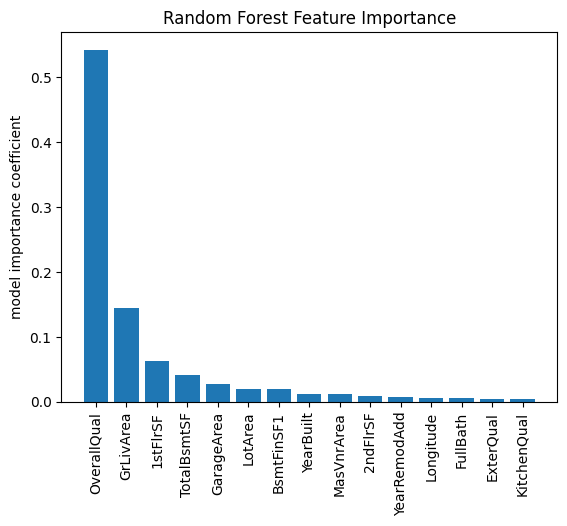

In [12]:
# Plot feature importance
import matplotlib.pyplot as plt

rf_feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
rf_importance_15 = rf_feature_importance.head(15)
plt.bar(rf_importance_15['Feature'], rf_importance_15['Importance'])
plt.xticks(rotation=90)
plt.ylabel('model importance coefficient')
plt.title("Random Forest Feature Importance")
plt.show()

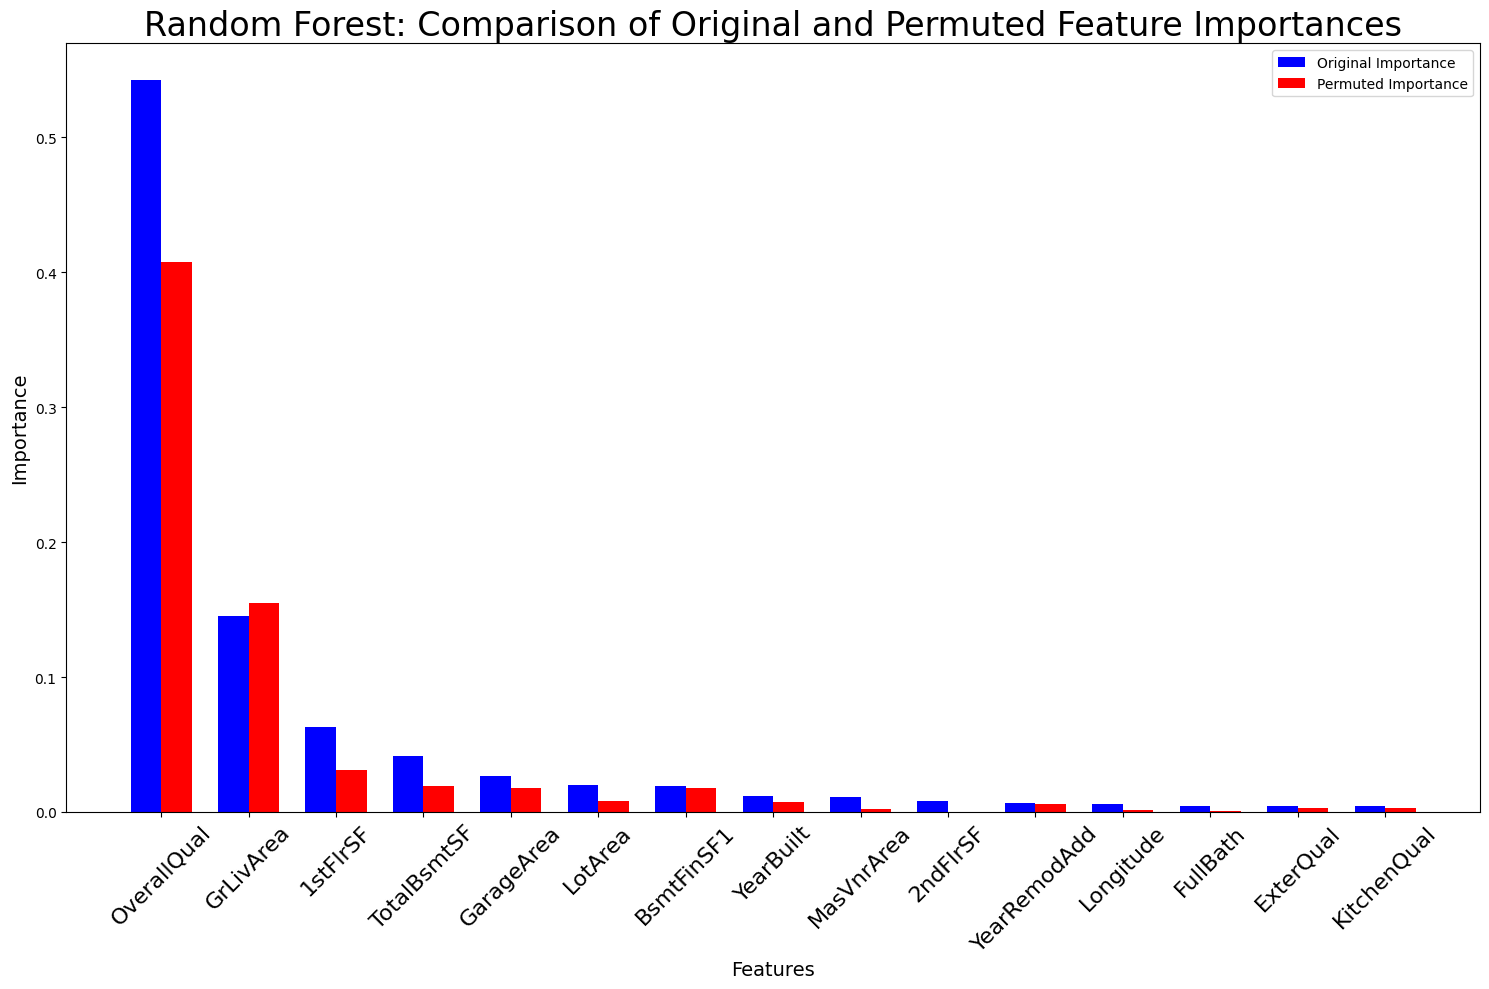

In [14]:
# Run permuted feature importance and compare to model feature importance
from sklearn.inspection import permutation_importance
import joblib

# Func for permuted feature importance
def permuted_feature_importance(pipeline, X_test, y_test):
    baseline_r2 = r2_score(y_test, pipeline.predict(X_test))
    importances = {}

    for feature in X_test.columns:
        X_test_permuted = X_test.copy()
        X_test_permuted[feature] = np.random.permutation(X_test_permuted[feature])

        permuted_r2 = r2_score(y_test, pipeline.predict(X_test_permuted))
        importances[feature] = baseline_r2 - permuted_r2

    return importances

# Calc permuted feature importance
rf_permuted_importances = permuted_feature_importance(rf_pipeline, X_test, y_test)

# Convert to DF and sort
rf_permuted_importances_df = pd.DataFrame.from_dict(rf_permuted_importances, orient='index', columns=['Importance'])
rf_permuted_importances_df.sort_values(by='Importance', ascending=False, inplace=True)

# Save CSV
# permuted_importances_df.to_csv("permuted_feature_importance.csv", index_label='Feature')

# Select top 15 features from original importances for comparison
top_features = rf_feature_importance.head(15)['Feature']

# Create empty DF to store comparison
comparison_importances = pd.DataFrame(index=top_features)

# Get original importances for top features
comparison_importances['Original Importance'] = rf_feature_importance.set_index('Feature').reindex(top_features)['Importance']

# Get permuted importances top features
comparison_importances['Permuted Importance'] = rf_permuted_importances_df.reindex(top_features)['Importance']

# Plot
fig, ax = plt.subplots(figsize=(15, 10))
bar_width = 0.35
index = np.arange(len(top_features))

ax.bar(index, comparison_importances['Original Importance'], bar_width, label='Original Importance', color='b')
ax.bar(index + bar_width, comparison_importances['Permuted Importance'], bar_width, label='Permuted Importance', color='r')

ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Importance', fontsize=14)
ax.set_title('Random Forest: Comparison of Original and Permuted Feature Importances', fontsize=24)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(comparison_importances.index, rotation=45, fontsize=16)
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Save to CSV
# rf_permuted_importances_df.to_csv("rf_permuted_feature_importance.csv", index_label='Feature')


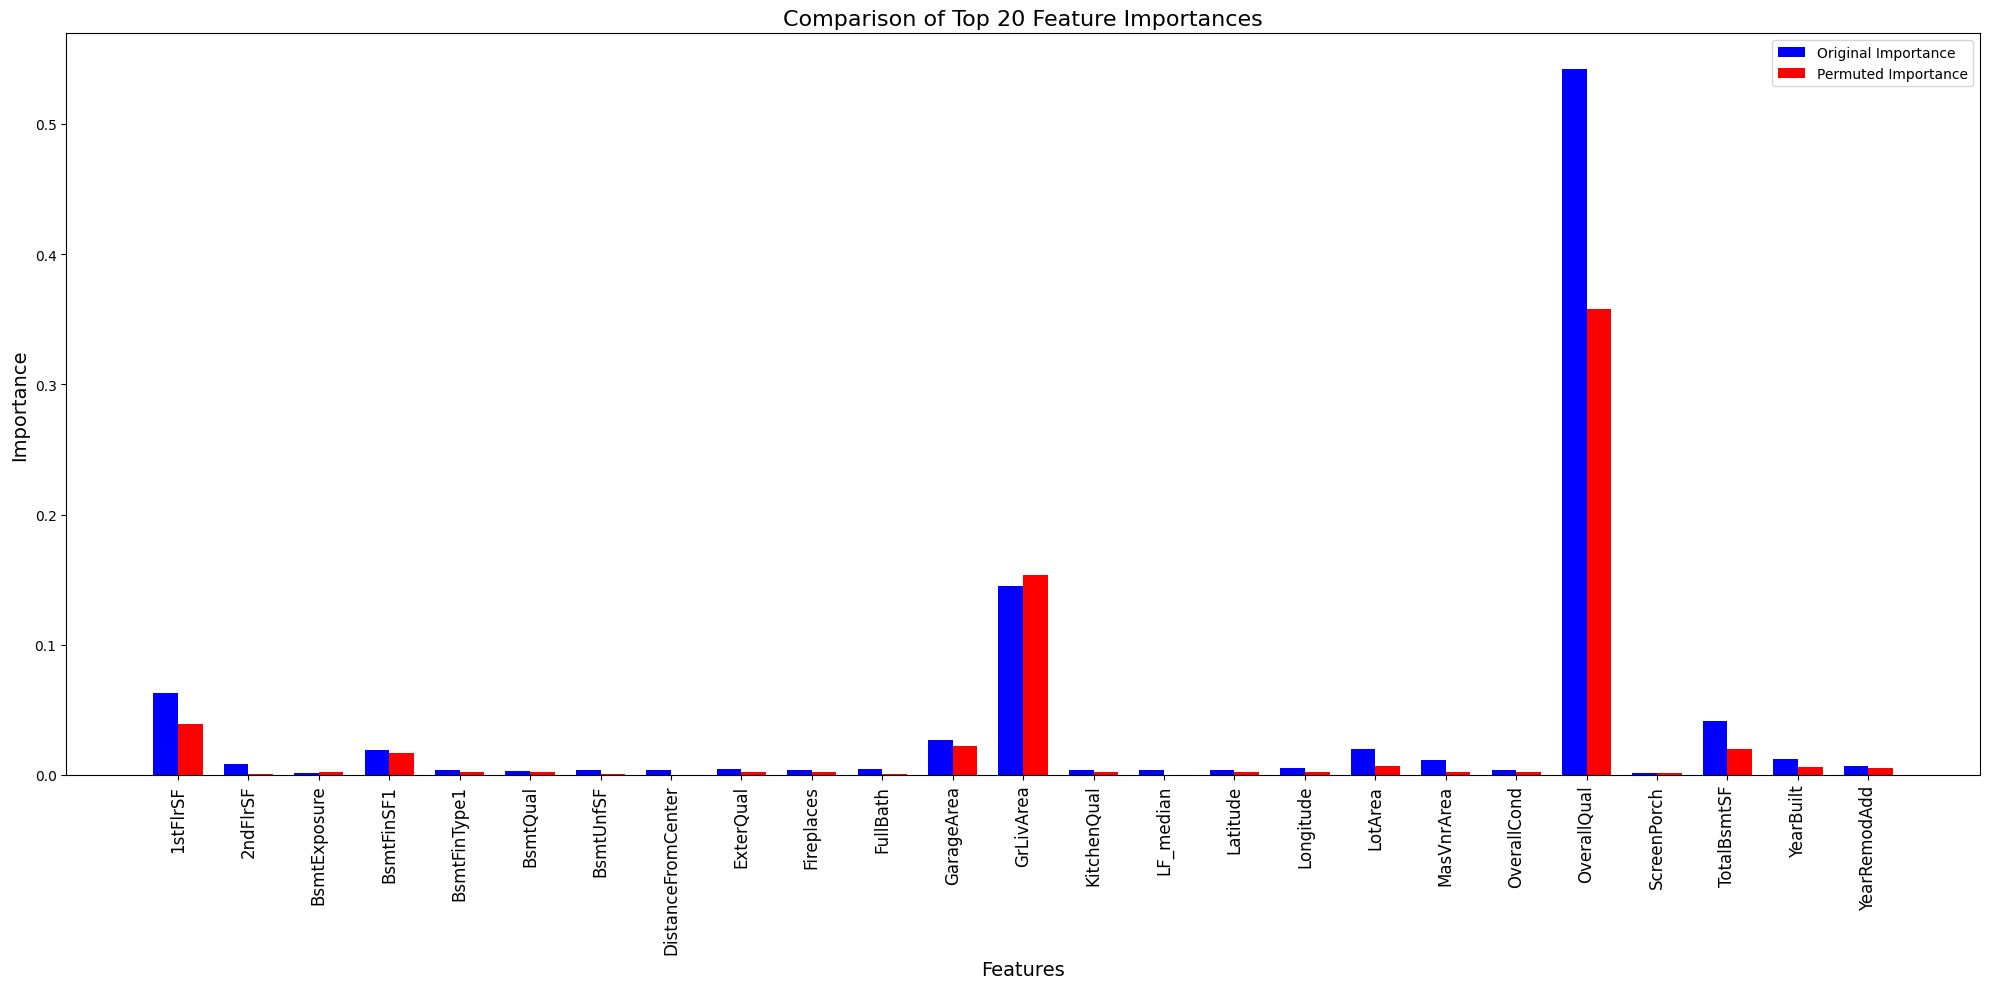

In [33]:
#Compare top 20 most important permuted features vs top 20 most important model features

# Select  top 20 features from model and permuted importances
top_20_original_features = rf_feature_importance.head(20)['Feature']
top_20_permuted_features = rf_permuted_importances_df.head(20).index

# Get importance stats
original_importances_top_features = rf_feature_importance.set_index('Feature')['Importance'].reindex(top_20_original_features)
permuted_importances_top_features = rf_permuted_importances_df['Importance'].reindex(top_20_permuted_features)

# Combine into DF
combined_top_features = pd.DataFrame({
    'Original Importance': original_importances_top_features,
    'Permuted Importance': permuted_importances_top_features
})

# combine all unique features
combined_top_features = combined_top_features.reindex(np.union1d(top_20_original_features, top_20_permuted_features))

# Fill any NaNs from reindexing with importances
combined_top_features['Original Importance'].fillna(rf_feature_importance.set_index('Feature')['Importance'], inplace=True)
combined_top_features['Permuted Importance'].fillna(rf_permuted_importances_df['Importance'], inplace=True)

# Plot
fig, ax = plt.subplots(figsize=(20, 10))
bar_width = 0.35
index = np.arange(len(combined_top_features))

ax.bar(index, combined_top_features['Original Importance'], bar_width, label='Original Importance', color='b')
ax.bar(index + bar_width, combined_top_features['Permuted Importance'], bar_width, label='Permuted Importance', color='r')

ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Importance', fontsize=14)
ax.set_title('Comparison of Top 20 Feature Importances', fontsize=16)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(combined_top_features.index, rotation=90, fontsize=12)
ax.legend()

plt.tight_layout()
plt.show()


100%|===================| 1784/1789 [01:46<00:00]        

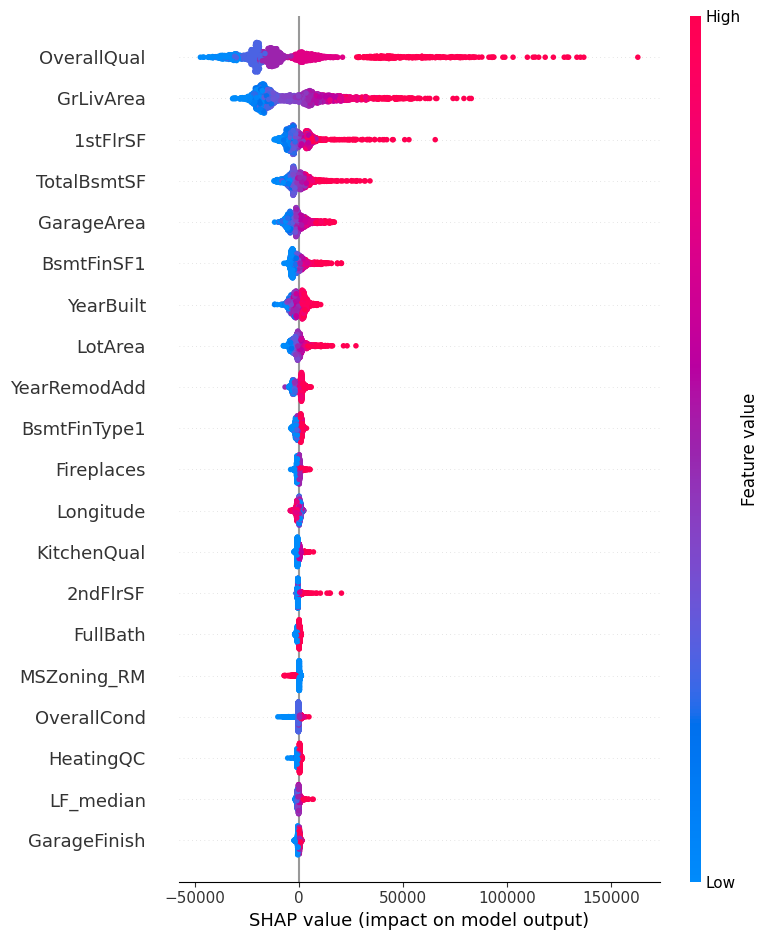

In [34]:
# Get RF SHAP values

import shap
import scipy.sparse 

rf_model = rf_final_model.named_steps['regressor']

# Preprocess 
X_train_preprocessed = rf_final_model.named_steps['preprocessor'].transform(X_train)

# Convert one-hot encoded data to dense format
if isinstance(X_train_preprocessed, scipy.sparse.csr_matrix):
    X_train_preprocessed = X_train_preprocessed.toarray()


encoded_features = rf_final_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
preprocessed_feature_names = np.concatenate([encoded_features, numeric_features])

# Create SHAP explainer
explainer = shap.Explainer(rf_model, X_train_preprocessed)

shap_values = explainer(X_train_preprocessed)

shap.summary_plot(shap_values, X_train_preprocessed, feature_names=preprocessed_feature_names)


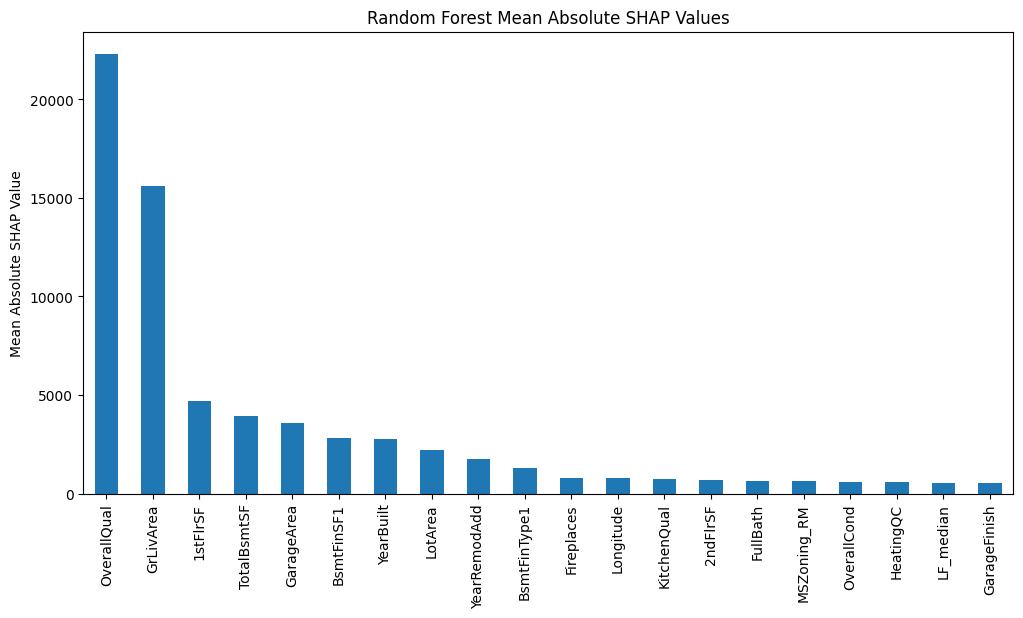

In [35]:
# Plot mean ABS SHAP values

# Calc mean abs SHAP values
mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)

# Create series with features and mean abs SHAP values
mean_abs_shap_series = pd.Series(mean_abs_shap_values, index=preprocessed_feature_names)

# Sort 
sorted_shap_series = mean_abs_shap_series.sort_values(ascending=False)

# Plot 
top_n_features = 20  
sorted_shap_series.head(top_n_features).plot(kind='bar', figsize=(12, 6), title='Random Forest Mean Absolute SHAP Values')
plt.ylabel('Mean Absolute SHAP Value')
plt.show()


In [ ]:
# rf_mean_abs_shaps = pd.DataFrame(sorted_shap_series)
# rf_mean_abs_shaps.to_csv("rf_meanabs_shaps.csv")

-------------------------------------------Methods to Check Model Reliability -----------------------------------------------------
I don't trust  shap values I'm getting here so I want to try a few things to understand how reliable y are

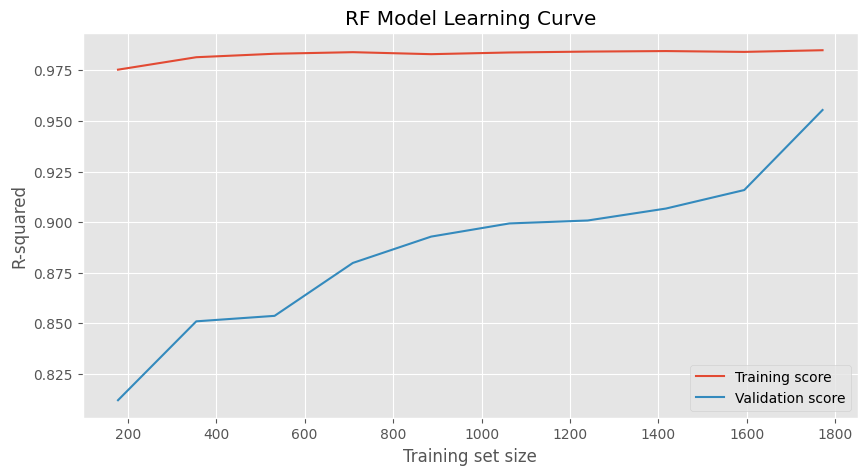

In [ ]:
# Learning Curve - see how model improves with more data - also get SHAP as I train

# Func to get SHAP values at various amounts of training data
def compute_shap_values(model, X_train, y_train, X_val):
    model.fit(X_train, y_train)  

    # Create SHAP explainer and calc SHAP values
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_val)

    # calc mean SHAP values
    mean_abs_shap_values = np.mean(np.abs(shap_values), axis=0)
    return mean_abs_shap_values

# Create lists to store results
train_sizes = []
train_scores = []
validation_scores = []
mean_abs_shap_values_list = []

# Define range of training set sizes 
for frac in np.linspace(0.1, 0.99, 10):
    X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(
        X_train_final, y_train, train_size=frac, random_state=42
    )

    # Compute shap for current subset
    mean_abs_shap_values = compute_shap_values(rf_model, X_train_sub, y_train_sub, X_val_sub)    
    mean_abs_shap_values_list.append(mean_abs_shap_values)
    
    # Store training set size
    train_sizes.append(X_train_sub.shape[0])

    # Evaluate training
    train_predictions = rf_model.predict(X_train_sub)
    train_score = r2_score(y_train_sub, train_predictions)
    train_scores.append(train_score)

    # Evaluate on validation dataset
    val_predictions = rf_model.predict(X_val_sub)
    val_score = r2_score(y_val_sub, val_predictions)
    validation_scores.append(val_score)

# Convert results to arrays 
train_sizes = np.array(train_sizes)
train_score = np.array(train_score)
validation_scores = np.array(validation_scores)
mean_abs_shap_values_list = np.array(mean_abs_shap_values_list)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_scores, label='Training score')
plt.plot(train_sizes, validation_scores, label='Validation score')
plt.ylabel('R-squared')
plt.xlabel('Training set size')
plt.title('RF Model Learning Curve')
plt.legend()
plt.show()

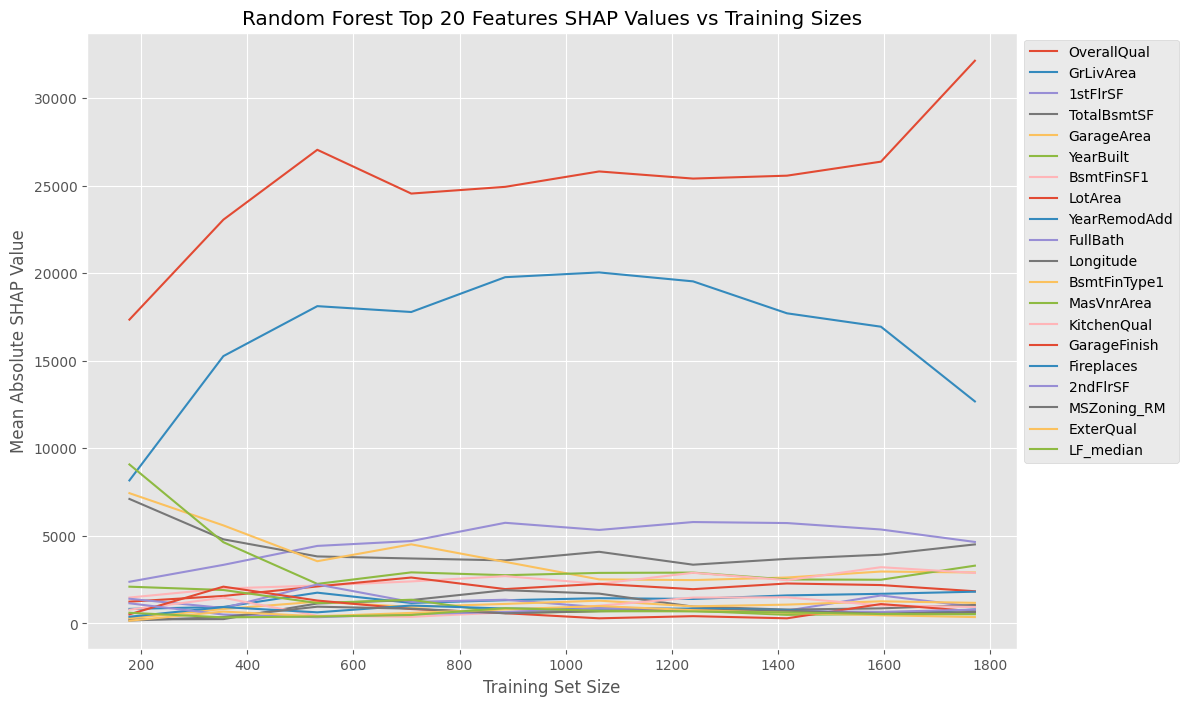

In [ ]:
# Create a plot of  change in SHAP values as training set rises like learning curve above

# Number of top features to consider
num_top_features = 20

# Calc avg SHAP values
average_shap_values = np.mean(mean_abs_shap_values_list, axis=0)

# Get indices of top features by mean abs shap values
sorted_top_feature_indices = np.argsort(average_shap_values)[-num_top_features:][::-1]

# Get names of top features
sorted_top_feature_names = X_train_final.columns[sorted_top_feature_indices]

# Plot
plt.figure(figsize=(12, 8))

# For each top feature, plot mean abs SHAP values for different training sizes
for feature_idx in sorted_top_feature_indices:
    feature_name = X_train_final.columns[feature_idx]
    plt.plot(train_sizes, mean_abs_shap_values_list[:, feature_idx], label=feature_name)

plt.xlabel('Training Set Size')
plt.ylabel('Mean Absolute SHAP Value')
plt.title('Random Forest Top 20 Features SHAP Values vs Training Sizes')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


Note for bootstrapping - X_sample_transformed becomes a sparse matrix which needs to be converted back to a dense matrix for  func to work!!!

In [91]:
# Plot mean abs SHAP values and their standard devs over many iterations of bootstrapped model
from joblib import Parallel, delayed
from sklearn.utils import resample

# Function to compute SHAP vals per model iteration
def compute_shap_for_iteration(X, y):
    # Bootstrap sample
    X_sample, y_sample = resample(X, y)
 
    # Fit model
    model = RandomForestRegressor()
    model.fit(X_sample, y_sample)
 
    # Calc SHAP
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_sample)
    return np.abs(shap_values)

# Number of iterations 
num_iterations = 500

# Parallelize SHAP calc
shap_values_iterations = Parallel(n_jobs=-1, verbose=10)(
    delayed(compute_shap_for_iteration)(X_train_final, y_train) for _ in range(num_iterations)
)

# Calc avg SHAP per iteration
shap_values_per_iteration = np.mean(shap_values_iterations, axis=1)

# Calc mean and stan dev
mean_abs_shap_values = np.mean(shap_values_per_iteration, axis=0)
std_abs_shap_values = np.std(shap_values_per_iteration, axis=0)

# Plot
plt.figure(figsize=(12, 8))

# Number of top features to consider
num_top_features = 20

# Get indices of top features by mean abs shap values
sorted_top_feature_indices = np.argsort(mean_abs_shap_values)[-num_top_features:][::-1]

# For each top feature, plot mean abs SHAP value with stan dev as error bars
for idx, feature_idx in enumerate(sorted_top_feature_indices):
    feature_name = X_train_final.columns[feature_idx]
    plt.errorbar(idx, mean_abs_shap_values[feature_idx], yerr=std_abs_shap_values[feature_idx], fmt='o', label=feature_name)

plt.xticks(range(num_top_features), [X_train_final.columns[i] for i in sorted_top_feature_indices], rotation=45)
plt.ylabel('Mean Absolute SHAP Value')
plt.title('Top 20 Features Mean Absolute SHAP Values Over 500 Iterations with Standard Deviations')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.5min


Interpretation: from  above chart and furr up showing SHAP values over different size samples, we can see that SHAP values for this random forest model are highly unstable, often with standard deviations of over 50% of  value and st dev ranges that change  SHAP values from postive to negative. This suggests that  dataset is not large enough to reliably conclude how different features impact house prices, despite  fact that  data is sufficient for making good predictions of house prices with  same model. In or words,  model can find an equation to accurately predict house prices, but we should not trust that  weighting that equation gives to different features actually represents  importance of those features to house prices. re are many ways to arrive at a conclusion (90% accurate prediction) and we just don't know if this model is  right way.  

-------------------------------------Now will move on to try XGBoost---------------------------------------------

In [16]:
# Run XGboost with one-hot encoding and pipeline creation

import xgboost as xgb

# Set pipeline for cross validation

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Define dataset
X = ames_geo_mlprep.drop('SalePrice', axis=1)
y = ames_geo_mlprep['SalePrice']

# Create transformer for one-hot encoding
categorical_features = X.select_dtypes(include=['object']).columns
xgb_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ], remainder='passthrough'
)

# Create pipeline
xgb_pipeline = Pipeline(steps=[('preprocessor', xgb_preprocessor),
                           ('regressor', xgb.XGBRFRegressor(objective='reg:squarederror', random_state=42))])

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Fit 
xgb_pipeline.fit(X_train, y_train)

# Evaluate 
xgb_predictions = xgb_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
r_squared = r2_score(y_test, xgb_predictions)
print(f"RMSE: {rmse}")
print(f"R-squared: {r_squared}")

# Perform CV
scores = cross_val_score(xgb_pipeline, X, y, cv=5, scoring='r2')
print("Cross-validated R-squared scores:", scores)


RMSE: 26363.97185614811
R-squared: 0.8866892303698115
Cross-validated R-squared scores: [0.86209193 0.87649752 0.87928445 0.89946708 0.88200128]


In [17]:
# Tune xgboost hyperparams

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# XGboost pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', xgb_preprocessor),
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Hyperparams grid
param_dist = {
    'regressor__n_estimators': randint(100,1000),
    'regressor__learning_rate': uniform(0.01, 0.6),
    'regressor__max_depth': randint(3, 10),
    'regressor__min_child_weight': randint(1, 6),
    'regressor__gamma': uniform(0, 0.5),
    'regressor__subsample': uniform(0.5, 0.5),
    'regressor__colsample_bytree': uniform(0.5, 0.5)
}

# Randomized search
random_search = RandomizedSearchCV(xgb_pipeline, param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring='r2', random_state=42, n_jobs=-1)

# Fit random search model
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)

Best parameters: {'regressor__colsample_bytree': 0.8167004271583629, 'regressor__gamma': 0.12007280938909654, 'regressor__learning_rate': 0.05551799686519835, 'regressor__max_depth': 3, 'regressor__min_child_weight': 3, 'regressor__n_estimators': 473, 'regressor__subsample': 0.8488337868484659}


In [18]:
# Check model sensitivity to hyperparameters
from sklearn.metrics import make_scorer, r2_score, mean_squared_error

# Custom scorer for RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Multiple scoring metrics
scoring = {'R2': 'r2', 'RMSE': rmse_scorer}

# Randomized search
random_search = RandomizedSearchCV(xgb_pipeline, param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring=scoring, refit='RMSE', 
                                   random_state=42, n_jobs=-1)

# Fit random search model
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", random_search.best_params_)

# Best scores
print("Best RMSE:", -random_search.cv_results_['mean_test_RMSE'][random_search.best_index_])
print("Best R2:", random_search.cv_results_['mean_test_R2'][random_search.best_index_])


Best parameters: {'regressor__colsample_bytree': 0.8167004271583629, 'regressor__gamma': 0.12007280938909654, 'regressor__learning_rate': 0.05551799686519835, 'regressor__max_depth': 3, 'regressor__min_child_weight': 3, 'regressor__n_estimators': 473, 'regressor__subsample': 0.8488337868484659}
Best RMSE: 18863.95209232453
Best R2: 0.9319047135993725


  colsample_bytree     gamma learning_rate max_depth min_child_weight  \
0          0.68727  0.475357      0.449196         7                5   
1         0.549987  0.229624      0.210225         5                5   
2         0.969276  0.000389      0.605327         3                4   
3         0.715973  0.145615      0.377112         4                4   
4         0.728035  0.392588      0.129804         9                4   

  n_estimators subsample        R2    std_R2          RMSE     std_RMSE  
0          714  0.722916  0.880891  0.023265 -25152.814669  3530.569565  
1          869  0.860999  0.917740  0.017075 -20775.058867  1934.975234  
2          413  0.762378  0.876602  0.027440 -25380.321293  1832.063839  
3          799  0.683181  0.900727  0.014707 -22943.774054  2245.909145  
4          931  0.733381  0.915761  0.020711 -20961.644840  2257.120902  


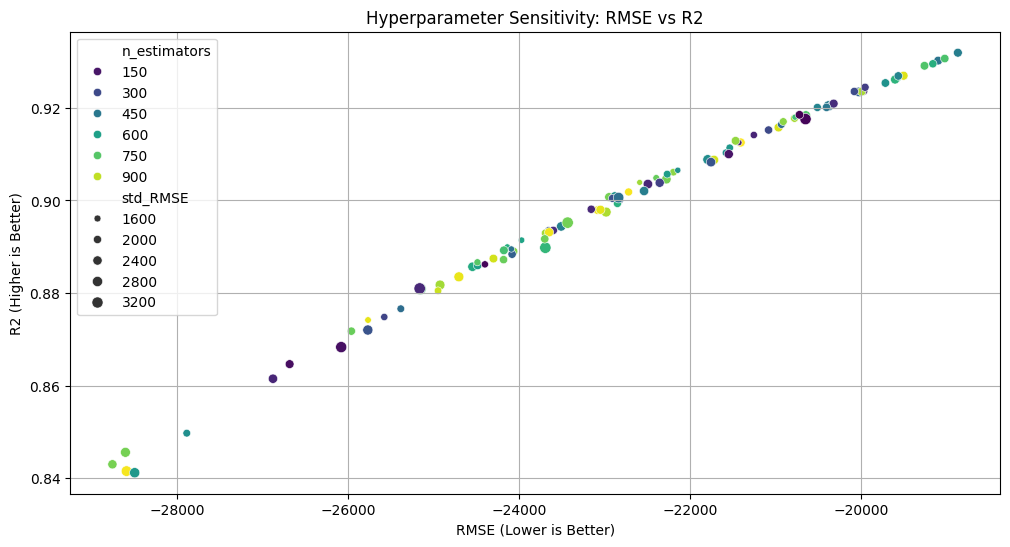

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert cv_results to a DF
cv_results_df = pd.DataFrame(random_search.cv_results_)

# Select columns of interest
interested_columns = [col for col in cv_results_df.columns if 'param_' in col or 'mean_test_' in col or 'std_test_' in col]
results_df = cv_results_df[interested_columns]

# Rename columns for readability
results_df.columns = results_df.columns.str.replace('param_regressor__', '').str.replace('mean_test_', '').str.replace('std_test_', 'std_')

# analyze DF
print(results_df.head())

# Plot 
plt.figure(figsize=(12, 6))
sns.scatterplot(data=results_df, x='RMSE', y='R2', size='std_RMSE', hue='n_estimators', palette='viridis')
plt.title("Hyperparameter Sensitivity: RMSE vs R2")
plt.xlabel("RMSE (Lower is Better)")
plt.ylabel("R2 (Higher is Better)")
plt.grid(True)
plt.show()


In [20]:
# Rerun XGboost on hyperparm optimized values

# Define dataset
X = ames_geo_mlprep.drop('SalePrice', axis=1)
y = ames_geo_mlprep['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define transformer for one-hot encoding
categorical_features = X.select_dtypes(include=['object']).columns
xgb_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ], remainder='passthrough'
)

# Best params from random search
best_params_xgb = random_search.best_params_

# Create new pipeline with preprocessor, XGBoost regressor with  best parameters
best_xgb_pipeline = Pipeline([
    ('preprocessor', xgb_preprocessor),
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror',
                                   n_estimators=best_params_xgb['regressor__n_estimators'],
                                   learning_rate=best_params_xgb['regressor__learning_rate'],
                                   max_depth=best_params_xgb['regressor__max_depth'],
                                   min_child_weight=best_params_xgb['regressor__min_child_weight'],
                                   gamma=best_params_xgb['regressor__gamma'],
                                   subsample=best_params_xgb['regressor__subsample'],
                                   colsample_bytree=best_params_xgb['regressor__colsample_bytree'],
                                   random_state=42))
])

# Fit 
best_xgb_pipeline.fit(X_train, y_train)

# Predict 
xgb_predictions = best_xgb_pipeline.predict(X_test)

# Calc metrics
rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
r_squared = r2_score(y_test, xgb_predictions)

print(f"RMSE: {rmse}")
print(f"R-squared: {r_squared}")


RMSE: 19620.69968939451
R-squared: 0.9372406420629493


In [21]:
# Visualize model tree
import xgboost

# Fit your pipeline as usual
best_xgb_pipeline.fit(X_train, y_train)

# Extract  preprocessor and  XGBoost model from  pipeline
preprocessor = best_xgb_pipeline.named_steps['preprocessor']
xgb_model = best_xgb_pipeline.named_steps['regressor']

# Get feature names after one-hot encoding
encoded_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Get numeric feature names
numeric_features = X.select_dtypes(exclude=['object']).columns

# Combine feature names
all_features = np.concatenate([encoded_features, numeric_features])

# Set feature names in XGBoost model
xgb_model.get_booster().feature_names = all_features.tolist()

# Create a dot file of tree
dot_file = xgboost.to_graphviz(xgb_model, num_trees=20) 

# Save to a file
# dot_file.render(filename='tree_visualization_1', format='pdf', cleanup=True)


In [22]:
# Extract feature importance from best XGBoost model

xgb_feature_importances = best_xgb_pipeline.named_steps['regressor'].feature_importances_

# Get feature names after one-hot encoding
encoded_features = best_xgb_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)

# Get numeric feature names
numeric_features = X.select_dtypes(exclude=['object']).columns

# Combine feature names
all_features = np.concatenate([encoded_features, numeric_features])

# Map feature importance to feature names
feature_importance_dict = dict(zip(all_features, xgb_feature_importances))

# Sort by importance
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

xgb_feature_importance = pd.DataFrame(sorted_feature_importance, columns=['Feature', 'Importance'], index=None)

# Save to csv
# xgb_feature_importance.to_csv("xgb_feature_importance_1.csv", index=False)

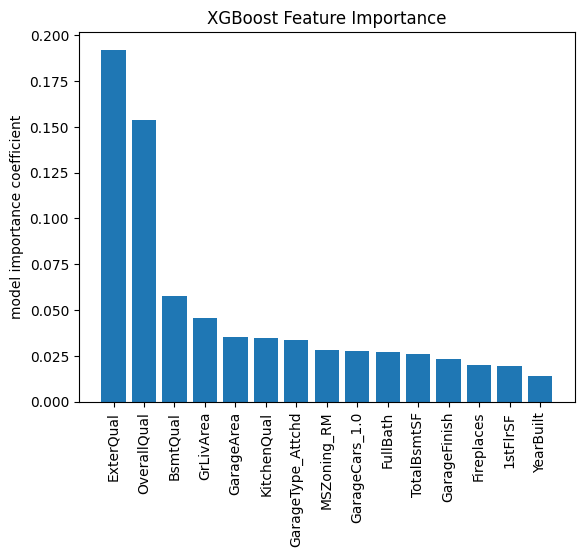

In [23]:
# Plot Feature Importance - top 15

xgb_importance_15 = xgb_feature_importance.head(15)
plt.bar(xgb_importance_15['Feature'], xgb_importance_15['Importance'])
plt.xticks(rotation=90)
plt.ylabel('model importance coefficient')
plt.title("XGBoost Feature Importance")
plt.show()

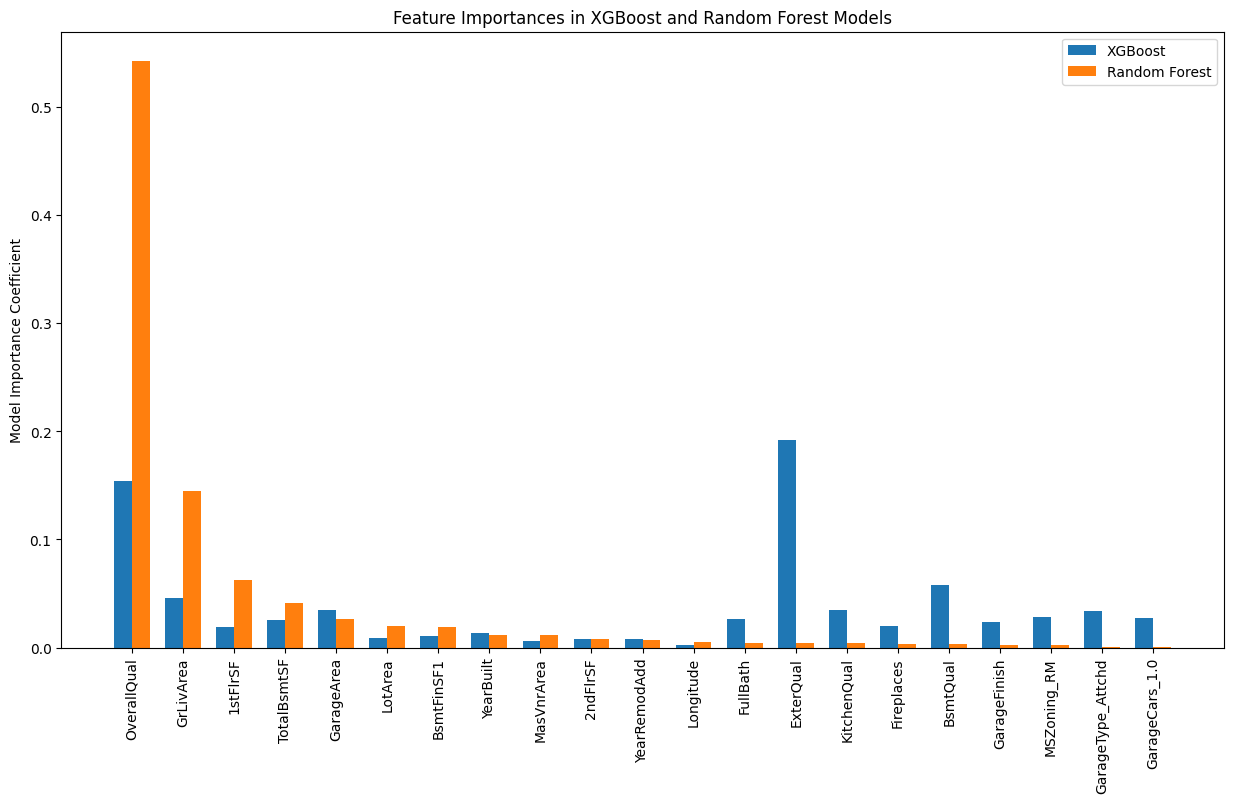

In [24]:
# Get top 15 features for both models
top_15_xgb = xgb_feature_importance.nlargest(15, 'Importance')
top_15_rf = rf_feature_importance.nlargest(15, 'Importance')

# Create a list of unique features present in top 15 of either model
unique_features = list(set(top_15_xgb['Feature']).union(set(top_15_rf['Feature'])))

# Prepare a combined DataFrame
combined = pd.DataFrame(index=unique_features)

# Add importances from both models to the combined DataFrame
combined = combined.join(xgb_feature_importance.set_index('Feature')).join(rf_feature_importance.set_index('Feature'), lsuffix='_xgb', rsuffix='_rf')

# Replace NaN values with 0 (for features not in top 15 in one of the models)
combined.fillna(0, inplace=True)

combined.sort_values(by='Importance_rf', ascending=False, inplace=True)

# Plot
fig, ax = plt.subplots(figsize=(15, 8))
width = 0.35  # Width of the bars

# Creating bar positions
ind = np.arange(len(combined))

# Plotting XGBoost and Random Forest importances side by side
ax.bar(ind - width/2, combined['Importance_xgb'], width, label='XGBoost')
ax.bar(ind + width/2, combined['Importance_rf'], width, label='Random Forest')

# Labels and titles
ax.set_ylabel('Model Importance Coefficient')
ax.set_title('Feature Importances in XGBoost and Random Forest Models')
ax.set_xticks(ind)
ax.set_xticklabels(combined.index, rotation=90)
ax.legend()

plt.show()

In [68]:
combined

,Importance_xgb,Importance_rf
MasVnrArea,0.006360,0.011262
KitchenQual,0.034682,0.004083
GarageFinish,0.023406,0.002415
1stFlrSF,0.019301,0.063009
GarageType_Attchd,0.033855,0.000411
YearRemodAdd,0.008235,0.006996
Fireplaces,0.019826,0.003527
GrLivArea,0.045524,0.144888
GarageCars_1.0,0.027664,0.000159
2ndFlrSF,0.007851,0.008361


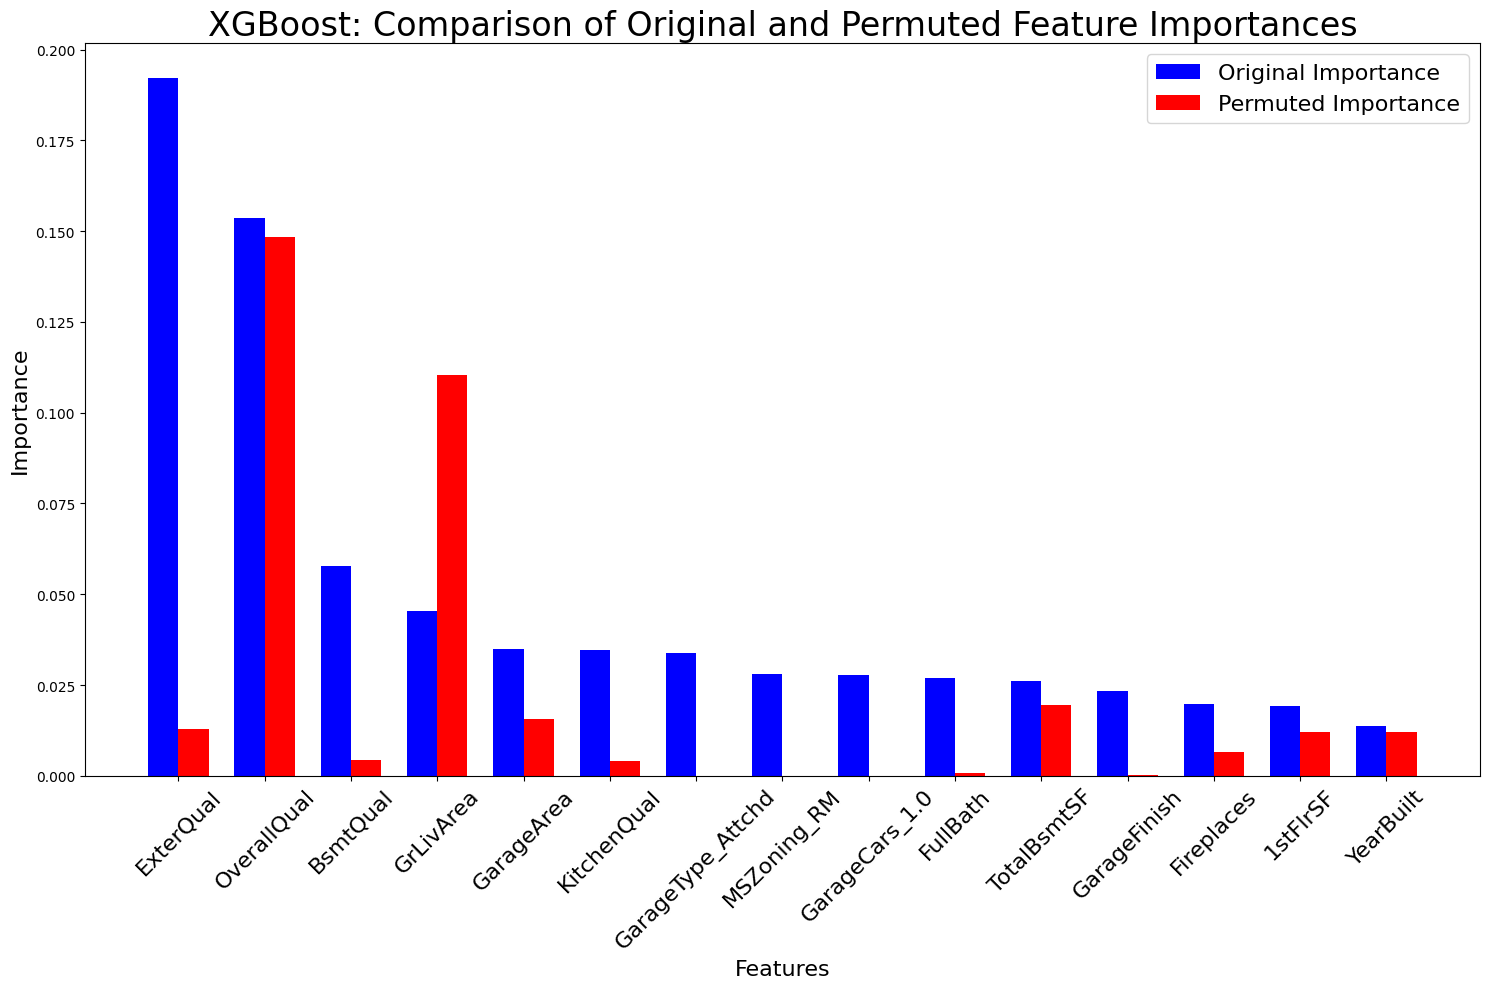

In [28]:
# Run permutation importance and compare to model feature importance
from sklearn.inspection import permutation_importance

def permuted_feature_importance(pipeline, X_test, y_test):
    baseline_r2 = r2_score(y_test, pipeline.predict(X_test))
    importances = {}

    for feature in X_test.columns:
        X_test_permuted = X_test.copy()
        X_test_permuted[feature] = np.random.permutation(X_test_permuted[feature])

        permuted_r2 = r2_score(y_test, pipeline.predict(X_test_permuted))
        importances[feature] = baseline_r2 - permuted_r2

    return importances

# Calculate permuted feature importance
xgb_permuted_importances = permuted_feature_importance(best_xgb_pipeline, X_test, y_test)

# Convert to DF and sort
xgb_permuted_importances_df = pd.DataFrame.from_dict(xgb_permuted_importances, orient='index', columns=['Importance'])
xgb_permuted_importances_df.sort_values(by='Importance', ascending=False, inplace=True)


# Select  top 15 features from model importances for comparison
top_features = xgb_feature_importance.head(15)['Feature']

# Create empty DF  for comparisons
comparison_importances = pd.DataFrame(index=top_features)

# Get model importances for top features
comparison_importances['Original Importance'] = xgb_feature_importance.set_index('Feature').reindex(top_features)['Importance']

# Get  permuted importances for same features
comparison_importances['Permuted Importance'] = xgb_permuted_importances_df.reindex(top_features)['Importance']

# Plot
fig, ax = plt.subplots(figsize=(15, 10))
bar_width = 0.35
index = np.arange(len(top_features))

ax.bar(index, comparison_importances['Original Importance'], bar_width, label='Original Importance', color='b')
ax.bar(index + bar_width, comparison_importances['Permuted Importance'], bar_width, label='Permuted Importance', color='r')

ax.set_xlabel('Features', fontsize=16)
ax.set_ylabel('Importance', fontsize=16)
ax.set_title('XGBoost: Comparison of Original and Permuted Feature Importances', fontsize=24)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(comparison_importances.index, rotation=45, fontsize=16)
ax.legend(fontsize=16)

plt.tight_layout()
plt.show()


In [75]:
 # Save to CSV
#  permuted_importances_df.to_csv("permuted_feature_importance.csv", index_label='Feature')

In [45]:
# Combine RF and XBG Permuted Importances to See if they Match

merged_importances_df = rf_permuted_importances_df.merge(xgb_permuted_importances_df, left_index=True, right_index=True, suffixes=('_rf', '_xgb'))

merged_importances_df.index.name = 'Feature'

merged_importances_df.head()

,Importance_rf,Importance_xgb
Feature,,
OverallQual,0.358110,0.162956
GrLivArea,0.153762,0.119176
1stFlrSF,0.039386,0.010429
GarageArea,0.022629,0.016130
TotalBsmtSF,0.019892,0.022564


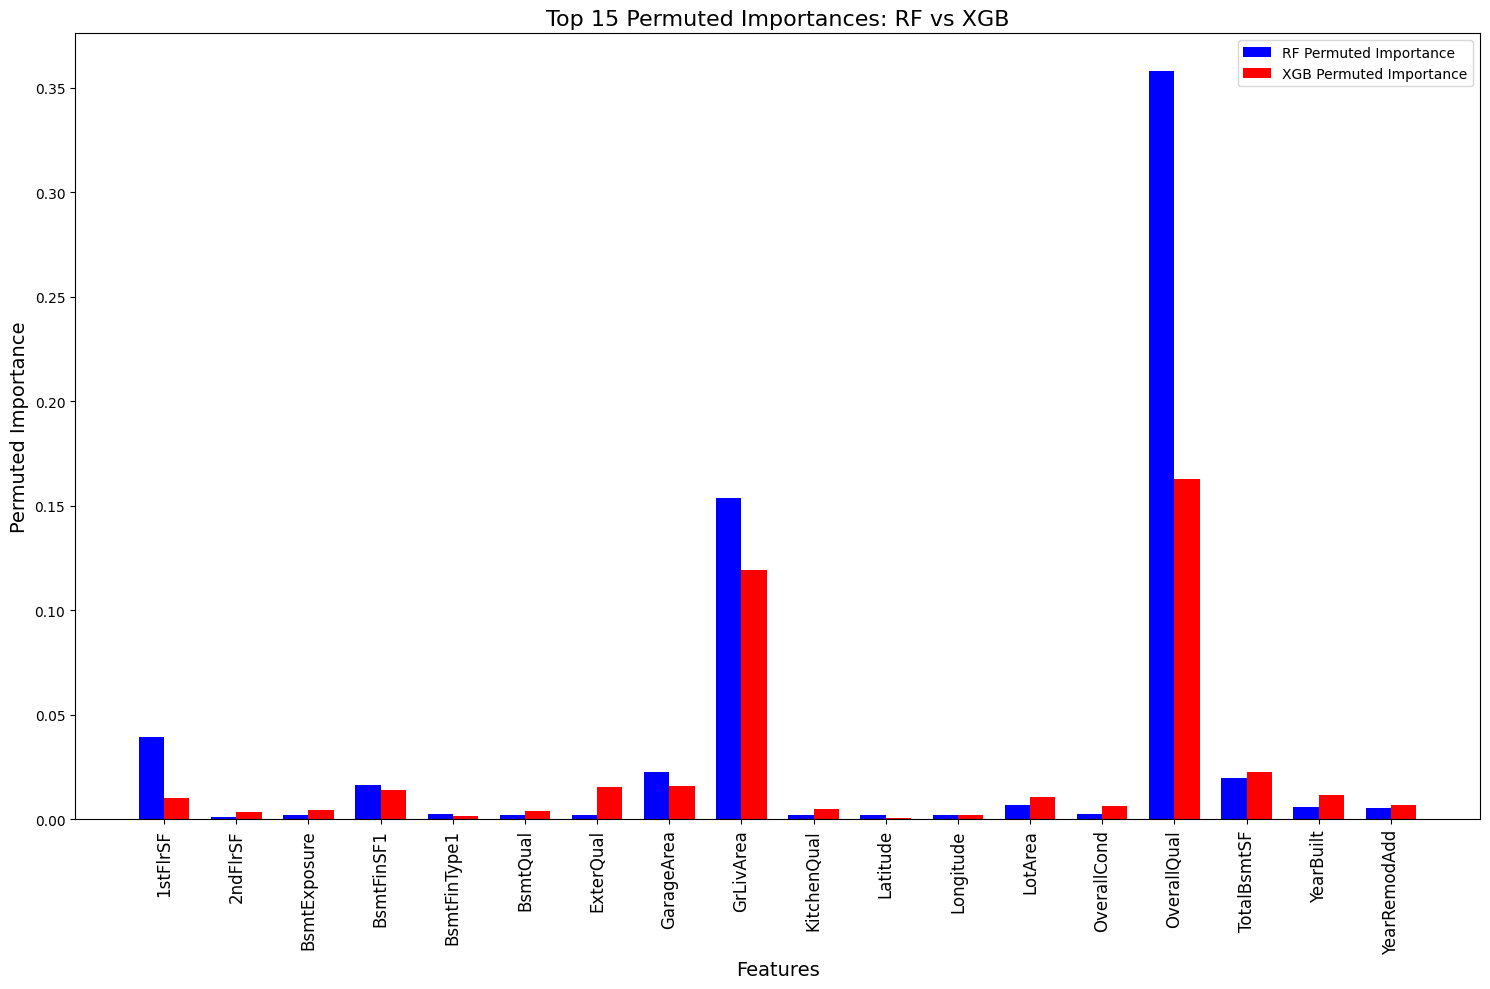

In [46]:
# Compare RF permuted importances to XGB permuted importances

# Select  top 15 features from both model's permuted importances
top_15_rf = rf_permuted_importances_df.nlargest(15, 'Importance')
top_15_xgb = xgb_permuted_importances_df.nlargest(15, 'Importance')

# Combine into a single list of unique features
combined_features = np.union1d(top_15_rf.index, top_15_xgb.index)

# Get actual importances for features from merged DF
combined_importances = merged_importances_df.loc[combined_features]

# Plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
bar_width = 0.35
index = np.arange(len(combined_features))

ax.bar(index, combined_importances['Importance_rf'], bar_width, label='RF Permuted Importance', color='b')
ax.bar(index + bar_width, combined_importances['Importance_xgb'], bar_width, label='XGB Permuted Importance', color='r')

ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Permuted Importance', fontsize=14)
ax.set_title('Top 15 Permuted Importances: RF vs XGB', fontsize=16)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(combined_features, rotation=90, fontsize=12)
ax.legend()

plt.tight_layout()
plt.show()


In [13]:
# xgb_feature_importance.to_csv("xgb_feature_importance_5.csv", index=False)

-------------------------------------------------------- Feature Importance -----------------------------------------------------------------------------------------
 feature importance levels from  RF model differ significantly from those from  XGB model. Since my goal is understand individual feature importance and feature interactions (importance of features in concert), I want to explore different measures/methods of feature importance like SHAP, Permuation Feature Importance, PDP & ICE plots, and more. 

Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
[16:14:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


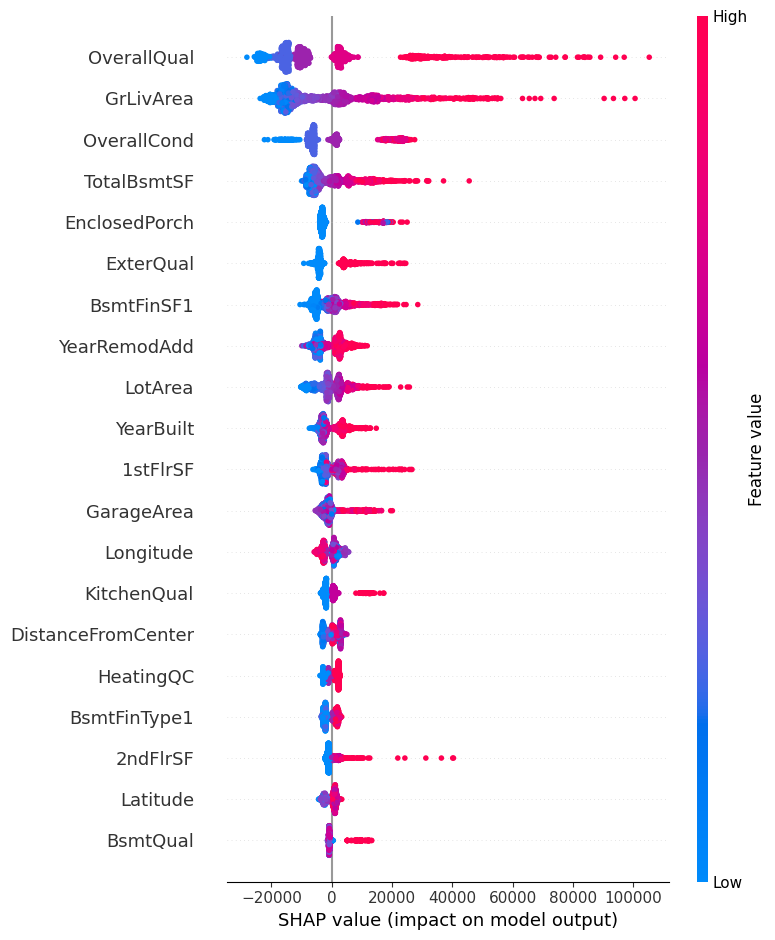

In [30]:
# Get XGBoost SHAP values and plot SHAP summary

import shap
import scipy.sparse 
xgb_model = best_xgb_pipeline.named_steps['regressor']

# Preprocess
X_train_preprocessed = best_xgb_pipeline.named_steps['preprocessor'].transform(X_train)

# Convert one-hot encoded data to dense format
if isinstance(X_train_preprocessed, scipy.sparse.csr.csr_matrix):
    X_train_preprocessed = X_train_preprocessed.toarray()


encoded_features = best_xgb_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
preprocessed_feature_names = np.concatenate([encoded_features, numeric_features])

# Create SHAP explainer
explainer = shap.Explainer(xgb_model, X_train_preprocessed)

shap_values = explainer(X_train_preprocessed)

# Plot
shap.summary_plot(shap_values, X_train_preprocessed, feature_names=preprocessed_feature_names)


[16:20:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


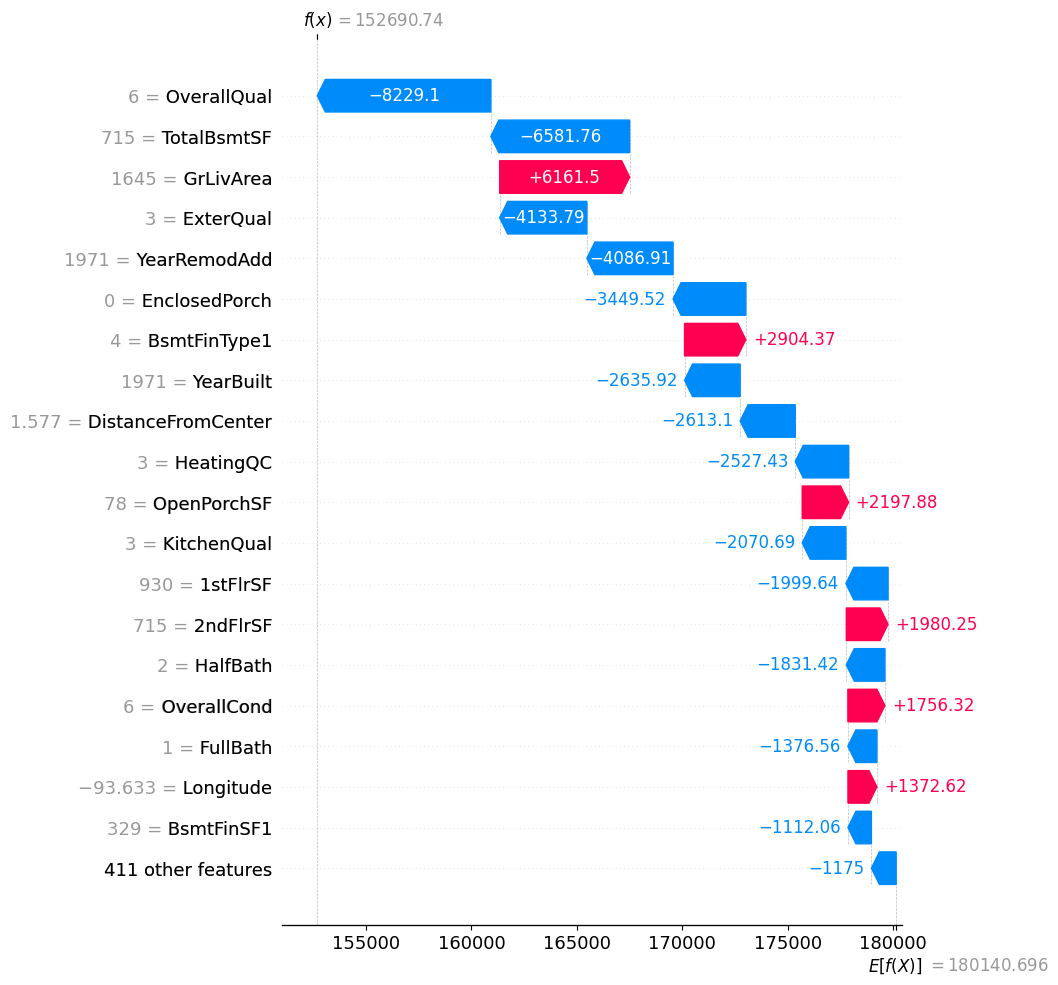

In [36]:
import shap
import scipy.sparse
import numpy as np
import matplotlib.pyplot as plt

# Assuming your existing code above...

# Create SHAP explainer and compute shap_values
explainer = shap.Explainer(xgb_model, X_train_preprocessed)
shap_values = explainer(X_train_preprocessed)

# Setting feature names
encoded_features = best_xgb_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
preprocessed_feature_names = np.concatenate([encoded_features, numeric_features])

# Update shap_values with feature names
shap_values.feature_names = preprocessed_feature_names

# Choose a specific instance (house) to explain
# Replace 0 with the index of the house you are interested in
house_index = 0

# Create a waterfall plot for the chosen instance
shap_values_single = shap_values[house_index]

# Make the waterfall plot
shap.plots.waterfall(shap_values_single, max_display=20)

# Display the plot
plt.show()


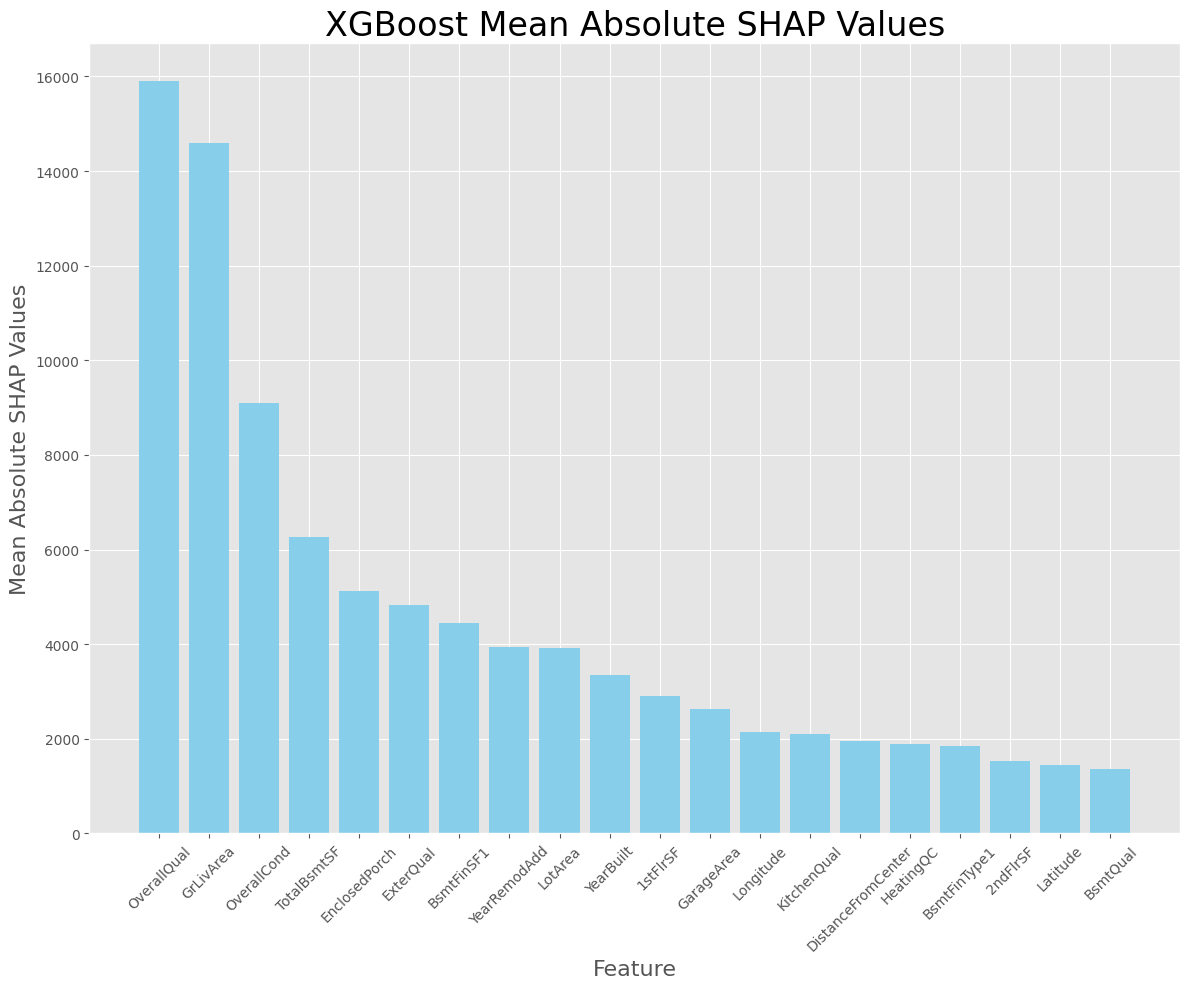

In [38]:
# Plot mean absolute shap values to compare to RF
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)

feature_names = preprocessed_feature_names

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'mean_abs_shap': mean_abs_shap
})

top_features = feature_importance.sort_values(by='mean_abs_shap', ascending=False).head(20)

plt.style.use("ggplot")
# Plot
plt.figure(figsize=(12,10))
plt.bar(top_features['feature'], top_features['mean_abs_shap'], color='skyblue')
plt.ylabel('Mean Absolute SHAP Values', fontsize=16)
plt.xlabel('Feature', fontsize=16)
plt.title('XGBoost Mean Absolute SHAP Values', fontsize=24)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


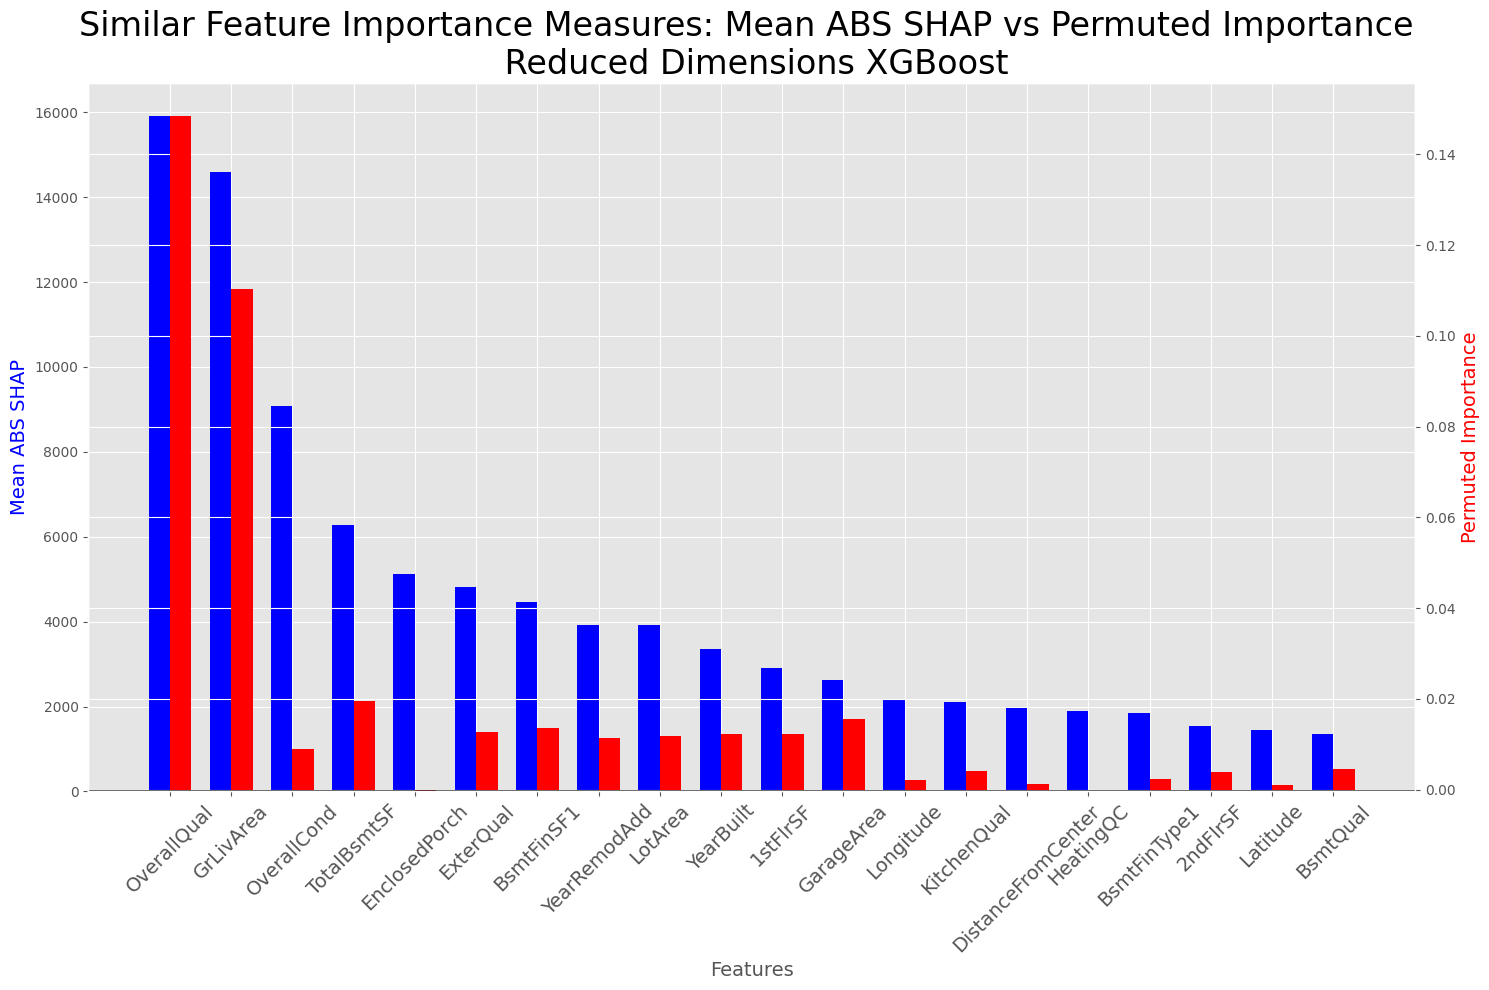

In [43]:
# Plot Mean ABS SHAP against Permuted Importance
full_importances = feature_importance.merge(
    xgb_permuted_importances_df['Importance'],
    left_on='feature',
    right_index=True,
    how = 'left'
)

full_importances.sort_values(by='mean_abs_shap', ascending=False, inplace=True)
full_importances_20 = full_importances.head(20)

# Plot
fig, ax1 = plt.subplots(figsize=(15,10))

width = 0.35
ind = np.arange(len(full_importances_20))

# Calculate the min values for both sets of data to align the zero on y-axis
min_shap = min(full_importances_20['mean_abs_shap'])
min_perm = min(full_importances_20['Importance'])
min_val = min(0, min_shap, min_perm) # Ensure that 0 is the upper limit if both min are positive

ax1.bar(ind - width/2, full_importances_20['mean_abs_shap'], width, color='blue', label='Mean ABS SHAP')
ax2 = ax1.twinx()
ax2.bar(ind + width/2, full_importances_20['Importance'], width, color='red', label='Permuted Importance')

ax1.set_xlabel('Features', fontsize=14)
ax1.set_ylabel('Mean ABS SHAP', fontsize=14, color='b')
ax2.set_ylabel('Permuted Importance', fontsize=14, color='r')

plt.title('Similar Feature Importance Measures: Mean ABS SHAP vs Permuted Importance \n Reduced Dimensions XGBoost', fontsize=24)

ax1.set_xticks(range(len(full_importances_20)))
ax1.set_xticklabels(full_importances_20['feature'], rotation=45, fontsize=14)

# Set the lower limit for both y-axes to align the zeros
ax1.set_ylim(bottom=min_val)
ax2.set_ylim(bottom=min_val)

# Add a horizontal line at y=0 for reference
ax1.axhline(0, color='black', linewidth=0.5)
ax2.axhline(0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()

[11:26:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


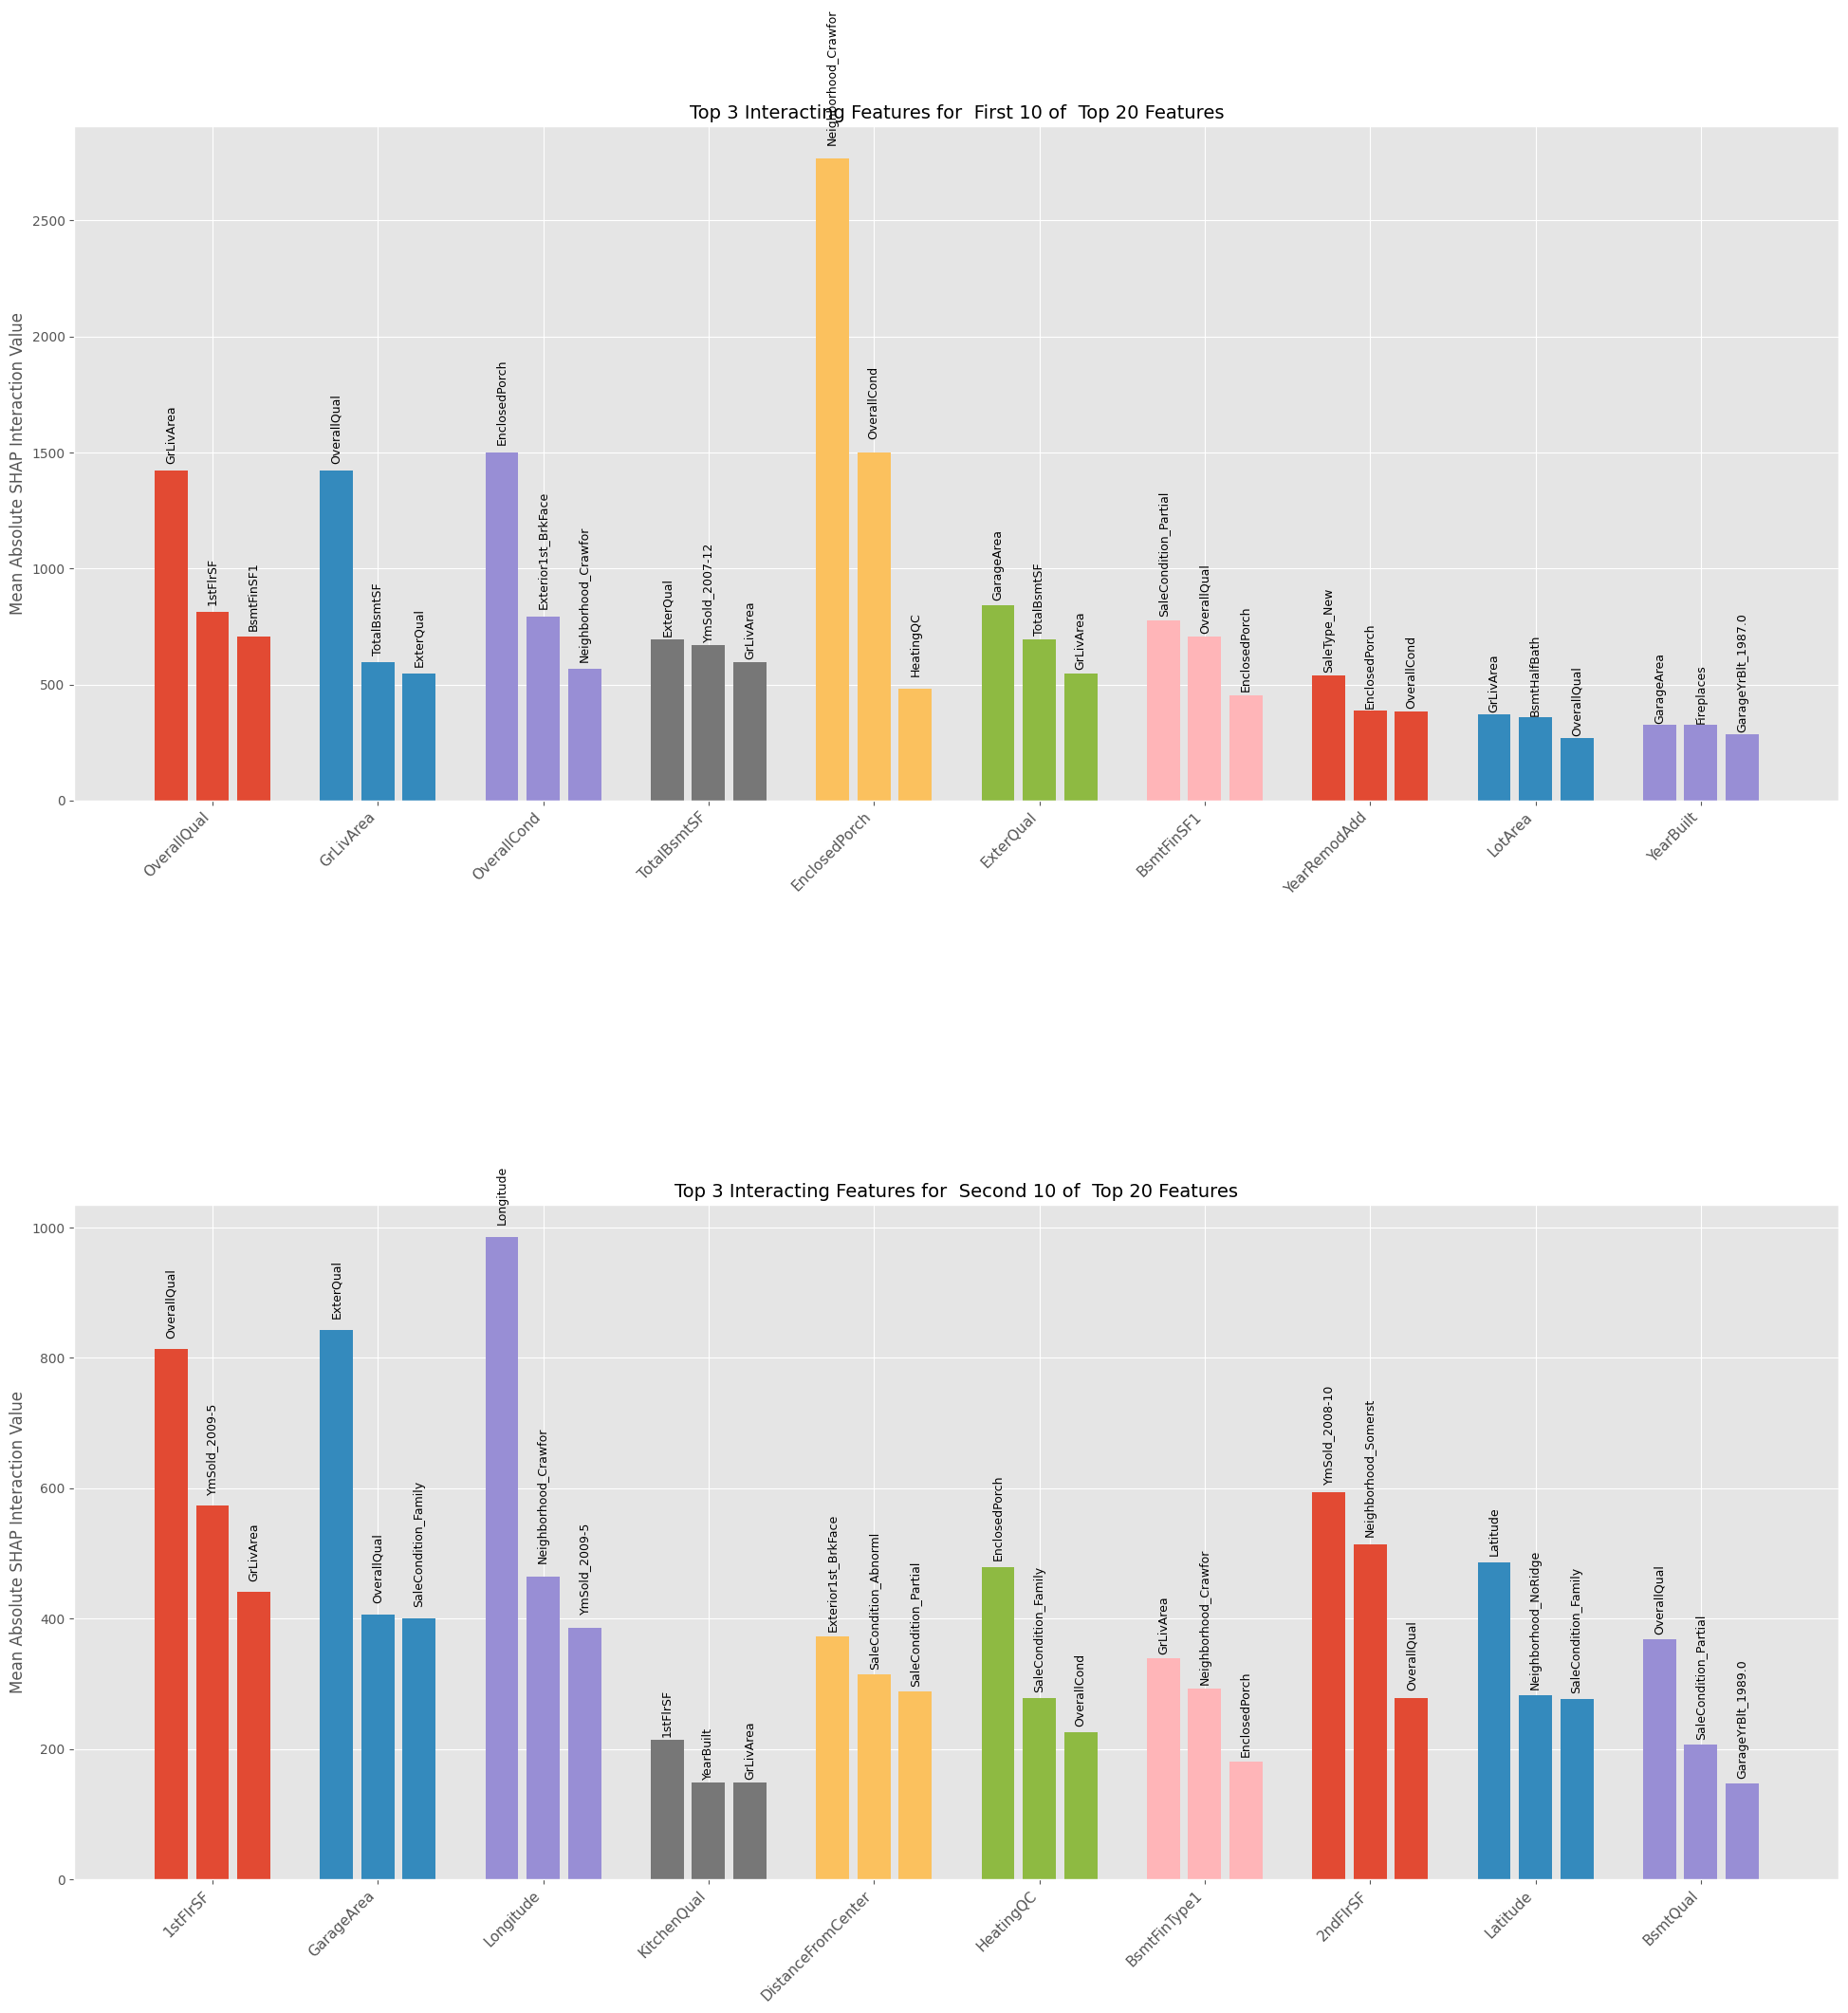

In [49]:
# Create and plot top 3 interaction features for each of  top 20 XGB model features (by mean abs SHAP val)

xgb_model = best_xgb_pipeline.named_steps['regressor']

# Create SHAP explainer 
explainer = shap.Explainer(xgb_model, feature_names=preprocessed_feature_names)

# Calc interaction values
interaction_values = explainer.shap_interaction_values(X_train_preprocessed)

# Calc mean interaction values across all samples
mean_interaction_values = np.abs(interaction_values).mean(axis=0)

top_20_feature_names = top_features['feature'].head(20)

# Create a dictionary to hold  top 3 interactions for each feature
top_interactions = {}

# Iterate over each of  top 20 features
for feature in top_20_feature_names:
    # Get  index of  feature
    feature_idx = np.where(preprocessed_feature_names == feature)[0][0]
    
    # Get  interaction values of this feature with all or features
    feature_interactions = mean_interaction_values[feature_idx, :]
    
    # Get  top 3 interactions excluding  self-interaction
    top_3_idx = np.argsort(feature_interactions)[-4:-1]  # Exclude last one:  feature itself
    top_3_features = preprocessed_feature_names[top_3_idx]
    top_3_values = feature_interactions[top_3_idx]

    # Store in dictionary
    top_interactions[feature] = (top_3_features, top_3_values)

import matplotlib.pyplot as plt

# Create func for plotting
def plot_feature_interactions(interactions_dict, features, ax):
    for i, feature in enumerate(features):
        # Get  top 3 interactions for  feature
        interacting_features, values = interactions_dict[feature]
        sorted_idx = np.argsort(values)[::-1]  # Sort  values in descending order
        values = values[sorted_idx]
        interacting_features = interacting_features[sorted_idx]

        # Position of bars for this feature
        bar_positions = np.array(range(i*4, i*4 + 3))
        
        # Plot  bars
        ax.bar(bar_positions, values)

        # Annotate bars with feature names
        for pos, val, interact_feature in zip(bar_positions, values, interacting_features):
            ax.text(pos, val + 0.02 * max(values), interact_feature, ha='center', va='bottom', rotation=90, fontsize=9)

    # Set  x-ticks to be in  middle of each group of bars
    ax.set_xticks([i*4 + 1 for i in range(len(features))])
    ax.set_xticklabels(features, rotation=45, ha='right', fontsize=11)
    ax.set_ylabel('Mean Absolute SHAP Interaction Value', fontsize=12)

# Split  top 20 features into two groups of 10
first_10_features = list(top_20_feature_names)[:10]
second_10_features = list(top_20_feature_names)[10:]

# Create subplots 
fig, axs = plt.subplots(2, 1, figsize=(24, 24), gridspec_kw={'hspace': 0.6})  # Adjust horizontal spacing

# Plot interactions for  first 10 features
plot_feature_interactions(top_interactions, first_10_features, axs[0])
axs[0].set_title('Top 3 Interacting Features for  First 10 of  Top 20 Features', fontsize=14)

# Plot interactions for  second 10 features
plot_feature_interactions(top_interactions, second_10_features, axs[1])
axs[1].set_title('Top 3 Interacting Features for  Second 10 of  Top 20 Features', fontsize=14)

# Show  plot with adjusted layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()


[11:28:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[11:28:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[11:28:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[11:28:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-au

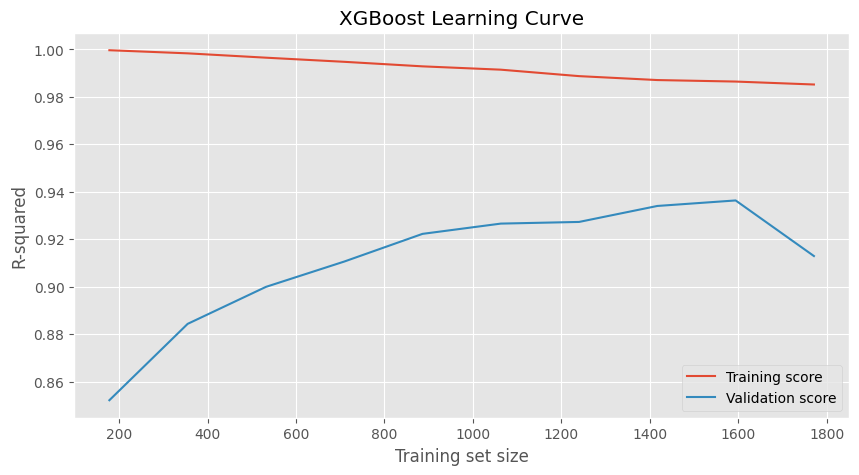

In [50]:
# Learning Curve - see how model improves with more data - also get SHAP as I train

from sklearn.metrics import mean_squared_error, r2_score

def compute_shap_values(pipeline, X_train, y_train, X_val):
    pipeline.fit(X_train, y_train)
    model = pipeline.named_steps['regressor']
   
    X_val_transformed = pipeline.named_steps['preprocessor'].transform(X_val)

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_val_transformed)

    # Compute mean SHAP values
    mean_shap_values = np.mean(shap_values, axis=0)
    
    transformed_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

    return pd.DataFrame({'feature': transformed_feature_names, 'mean_shap_value': mean_shap_values})

# Lists to store results
train_sizes = []
train_scores = []
validation_scores = []
shap_values_dfs = []

# Define range of training set sizes 
for frac in np.linspace(0.1, 0.99, 10):
    X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(X_train, y_train, train_size=frac, random_state=42)

    # Calc SHAP vals per subset
    shap_df = compute_shap_values(best_xgb_pipeline, X_train_sub, y_train_sub, X_val_sub)    
    shap_values_dfs.append(shap_df)
    
    # Store training set size
    train_sizes.append(X_train_sub.shape[0])

    # Evaluate model by set size
    train_predictions = best_xgb_pipeline.predict(X_train_sub)
    train_score = r2_score(y_train_sub, train_predictions)
    train_scores.append(train_score)

    # Evaluate on validation set
    val_predictions = best_xgb_pipeline.predict(X_val_sub)
    val_score = r2_score(y_val_sub, val_predictions)
    validation_scores.append(val_score)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_scores, label='Training score')
plt.plot(train_sizes, validation_scores, label='Validation score')
plt.ylabel('R-squared')
plt.xlabel('Training set size')
plt.title('XGBoost Learning Curve')
plt.legend()
plt.show()
    

[21:42:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[21:42:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[21:42:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[21:42:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-au

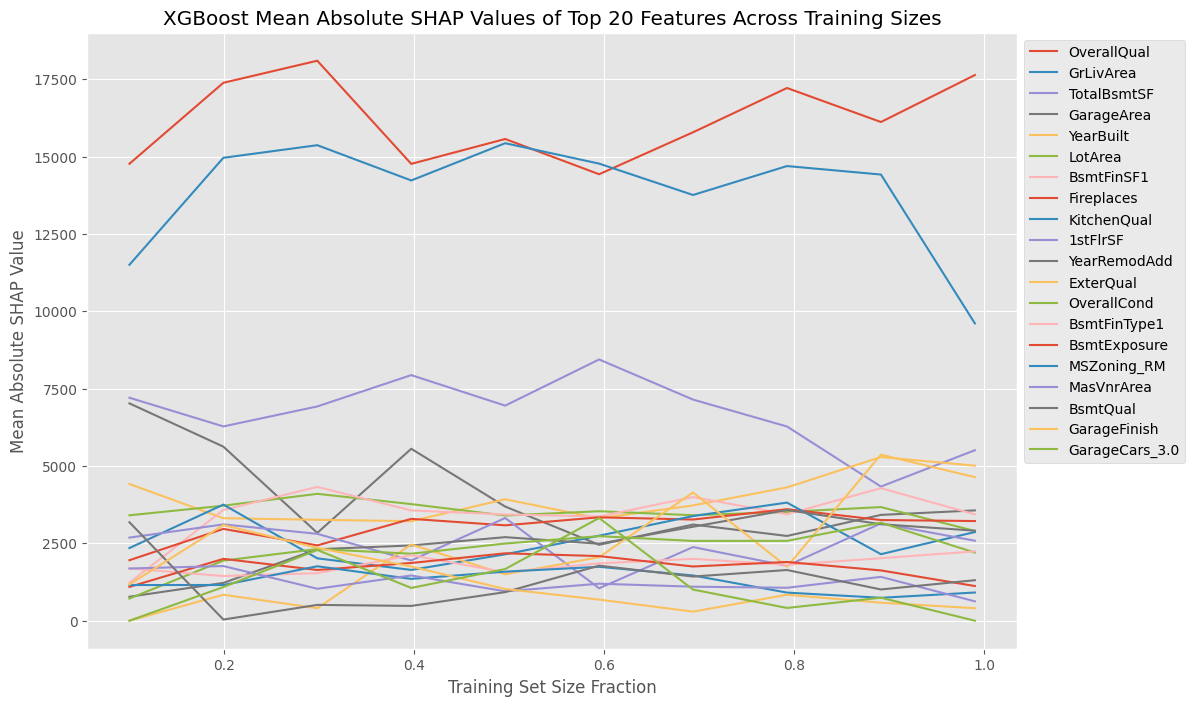

In [18]:
# Now plot  changes in SHAP values per training set size

# Function to calc abs SHAP values and pair with feature names
def compute_absolute_shap_values(pipeline, X_train, y_train, X_val):
    pipeline.fit(X_train, y_train)
    model = pipeline.named_steps['regressor']
    X_val_transformed = pipeline.named_steps['preprocessor'].transform(X_val)
    
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_val_transformed)

    abs_shap_values = np.abs(shap_values)
    
    transformed_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

    return pd.DataFrame(abs_shap_values, columns=transformed_feature_names)

# Lists to store results
train_sizes = []
shap_values_aggregated = pd.DataFrame()

# Compute mean abs SHAP vals per training set size 
for frac in np.linspace(0.1, 0.99, 10):
    X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(X_train, y_train, train_size=frac, random_state=42)

    abs_shap_df = compute_absolute_shap_values(best_xgb_pipeline, X_train_sub, y_train_sub, X_val_sub)
    shap_values_aggregated[frac] = abs_shap_df.mean()

    train_sizes.append(X_train_sub.shape[0])

# Convert fractions to consistent format (e.g., string) for df column names
train_sizes_str = [str(size) for size in train_sizes]

# Get top 20 features
top_features = shap_values_aggregated.mean(axis=1).nlargest(20).index

# Remove prefix from feature names
top_features_cleaned = top_features.str.replace('^cat__|^remainder__', '', regex=True)

# Create df 
top_features_shap_values = pd.DataFrame(index=top_features_cleaned)

# Populate df with mean abs SHAP values for top features across all training sizes
for size in shap_values_aggregated.columns:
    for feature, cleaned_feature in zip(top_features, top_features_cleaned):
        top_features_shap_values.at[cleaned_feature, size] = shap_values_aggregated.at[feature, size]

# Plot
plt.figure(figsize=(12, 8))
for feature in top_features_shap_values.index:
    plt.plot(shap_values_aggregated.columns, top_features_shap_values.loc[feature, :], label=feature)

plt.xlabel('Training Set Size Fraction')
plt.ylabel('Mean Absolute SHAP Value')
plt.title('XGBoost Mean Absolute SHAP Values of Top 20 Features Across Training Sizes')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 181 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 225 tasks      | elapsed:  

<Figure size 1200x700 with 0 Axes>

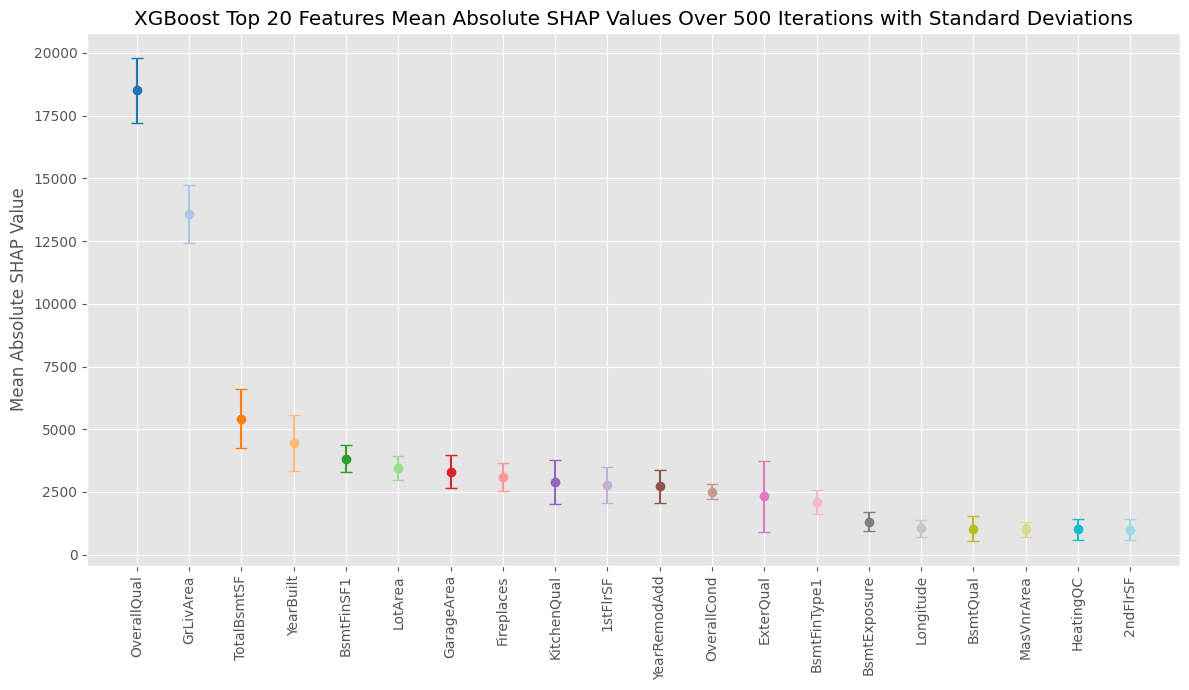

In [51]:
# Calc mean abs shap values per feature over 500 boostrapping iterations and see avgs and st devs for variability

from joblib import Parallel, delayed
from sklearn.utils import resample

# Use pipeline with XGBoost regressor and preprocessing
xgb_pipeline = best_xgb_pipeline

# Func to compute SHAP values on bootstrap samples
def compute_bootstrap_shap_values(X, y, pipeline, n):
    import shap
    from sklearn.utils import resample

    # Resample data
    X_sample, y_sample = resample(X, y, replace=True)
    
    # Train on resampled data
    pipeline.fit(X_sample, y_sample)
    
    # Extract trained model
    trained_model = pipeline.named_steps['regressor']
    
    # Get preprocessed features
    X_sample_transformed = pipeline.named_steps['preprocessor'].transform(X_sample)

    # print(f"Computing SHAP values for bootstrap sample ...")

    # Create SHAP explainer and calc SHAP values
    explainer = shap.TreeExplainer(trained_model)
    shap_values = explainer.shap_values(X_sample_transformed)

    # Calc mean absolute SHAP values
    mean_abs_shap_values = np.mean(np.abs(shap_values), axis=0)
    
    # Get feature names
    feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

    return pd.Series(mean_abs_shap_values, index=feature_names)

# Number of bootstrapping iterations
n_iterations = 500
n_jobs = -1  # Use all available cores

# Perform  bootstrap calcs
bootstrap_results = Parallel(n_jobs=n_jobs, verbose=10)(
    delayed(compute_bootstrap_shap_values)(X_train, y_train, xgb_pipeline, len(y_train)) for i in range(n_iterations)
)

# Convert results to DF
bootstrap_shap_values = pd.DataFrame(bootstrap_results)

# Calc mean and stan deviation SHAP values
mean_abs_shap_values = bootstrap_shap_values.mean(axis=0)
std_shap_values = bootstrap_shap_values.std(axis=0)

# Calculate confidence intervals
conf_intervals = bootstrap_shap_values.quantile([0.025, 0.975], axis=0).T
conf_intervals.columns = ['2.5%', '97.5%']

# Combine mean, std, and confidence intervals into one DF
xgb_shap_stats = pd.DataFrame({
    'Mean Abs SHAP Value': mean_abs_shap_values, 
    'Std Dev SHAP Value': std_shap_values
}).join(conf_intervals)


# Sort by absolute mean SHAP value
xgb_shap_stats = xgb_shap_stats.reindex(mean_abs_shap_values.abs().sort_values(ascending=False).index)
xgb_shap_stats.index = xgb_shap_stats.index.str.replace('remainder__', '')

# Print top 10 features 
# print(xgb_shap_stats.head(10))

top_20_features = xgb_shap_stats['Mean Abs SHAP Value'].abs().sort_values(ascending=False).head(20).index

# Plot
plt.figure(figsize=(12, 7))

top_20_features = xgb_shap_stats.head(20)

# Generate color list
colors = plt.cm.tab20(np.linspace(0, 1, 20))

plt.figure(figsize=(12, 7))

# Plot feature with unique color
for i, (feature_name, row) in enumerate(top_20_features.iterrows()):
    plt.errorbar(i, row['Mean Abs SHAP Value'], yerr=row['Std Dev SHAP Value'], fmt='o', capsize=4, color=colors[i], label=feature_name)

plt.xticks(range(len(top_20_features)), top_20_features.index, rotation=90)
plt.ylabel('Mean Absolute SHAP Value')
plt.title('XGBoost Top 20 Features Mean Absolute SHAP Values Over 500 Iterations with Standard Deviations')

# Create a custom legend
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 181 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 225 tasks      | elapsed:  

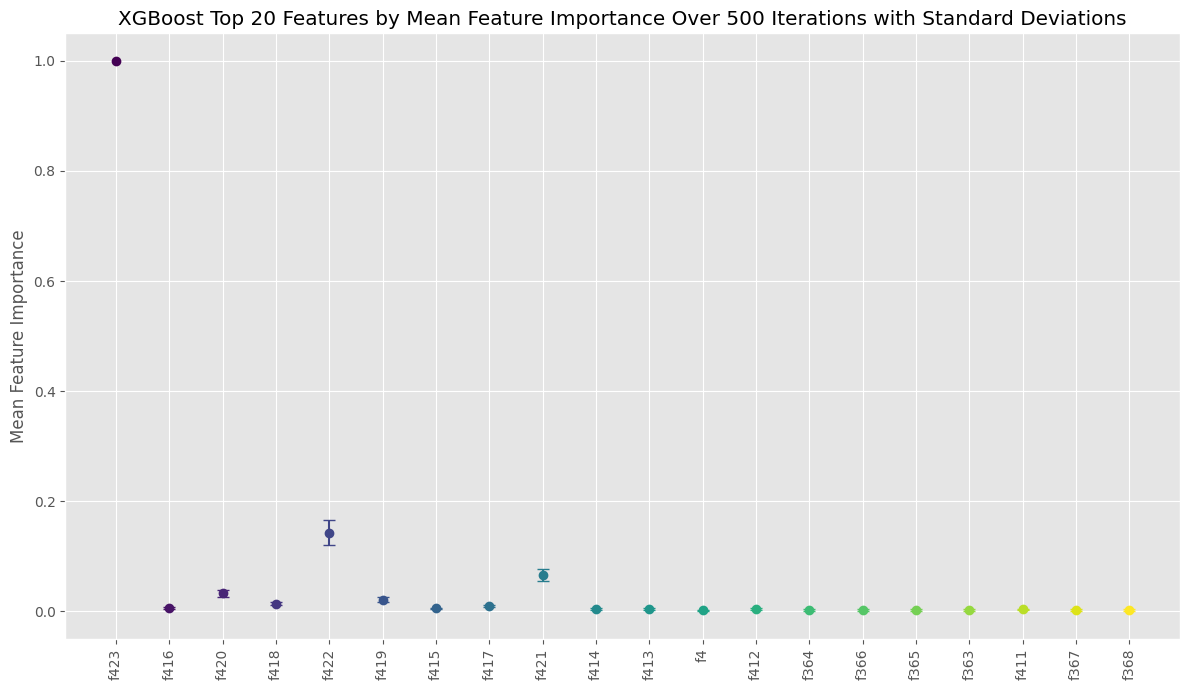

In [48]:
from joblib import Parallel, delayed
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Function to compute XGBoost feature importances on bootstrap samples
def compute_bootstrap_feature_importance(X, y, pipeline):
    # Resample data
    X_sample, y_sample = resample(X, y, replace=True)
    
    # Train on resampled data
    pipeline.fit(X_sample, y_sample)
    
    # Extract trained model
    trained_model = pipeline.named_steps['regressor'].get_booster()
    
    # Compute feature importance
    feature_importance = trained_model.get_score(importance_type='weight')
    
    # Convert to Series
    return pd.Series(feature_importance)

# Number of bootstrapping iterations
n_iterations = 500
n_jobs = -1  # Use all available cores

# Perform bootstrap calculations for feature importances in parallel
bootstrap_feature_importances = Parallel(n_jobs=n_jobs, verbose=10)(
    delayed(compute_bootstrap_feature_importance)(X_train, y_train, xgb_pipeline) for i in range(n_iterations)
)

# Convert list of Series to DataFrame
bootstrap_feature_importances_df = pd.DataFrame(bootstrap_feature_importances)

# Now you can sum along columns to normalize
total_importance = bootstrap_feature_importances_df.sum(axis=0)
normalized_feature_importances = bootstrap_feature_importances_df.div(total_importance)

# Compute mean and standard deviation for normalized feature importances
mean_normalized_feature_importances = normalized_feature_importances.mean(axis=0)
std_normalized_feature_importances = normalized_feature_importances.std(axis=0)

# Update the DataFrame with normalized values
xgb_feature_importance_stats['Mean Feature Importance'] = mean_normalized_feature_importances
xgb_feature_importance_stats['Std Dev Feature Importance'] = std_normalized_feature_importances

# Sort the stats by Mean Feature Importance
xgb_feature_importance_stats = xgb_feature_importance_stats.reindex(mean_feature_importances.sort_values(ascending=False).index)

# Get the top 20 features
top_20_features_importance = xgb_feature_importance_stats.head(20)

plt.figure(figsize=(12, 7))

# Generate color list
colors = plt.cm.viridis(np.linspace(0, 1, 20))

# Plot feature with unique color
for i, (feature_name, row) in enumerate(top_20_features_importance.iterrows()):
    plt.errorbar(i, row['Mean Feature Importance'], yerr=row['Std Dev Feature Importance'], fmt='o', capsize=4, color=colors[i], label=feature_name)

plt.xticks(range(len(top_20_features_importance)), top_20_features_importance.index, rotation=90)
plt.ylabel('Mean Feature Importance')
plt.title('XGBoost Top 20 Features by Mean Feature Importance Over 500 Iterations with Standard Deviations')

plt.tight_layout()
plt.show()


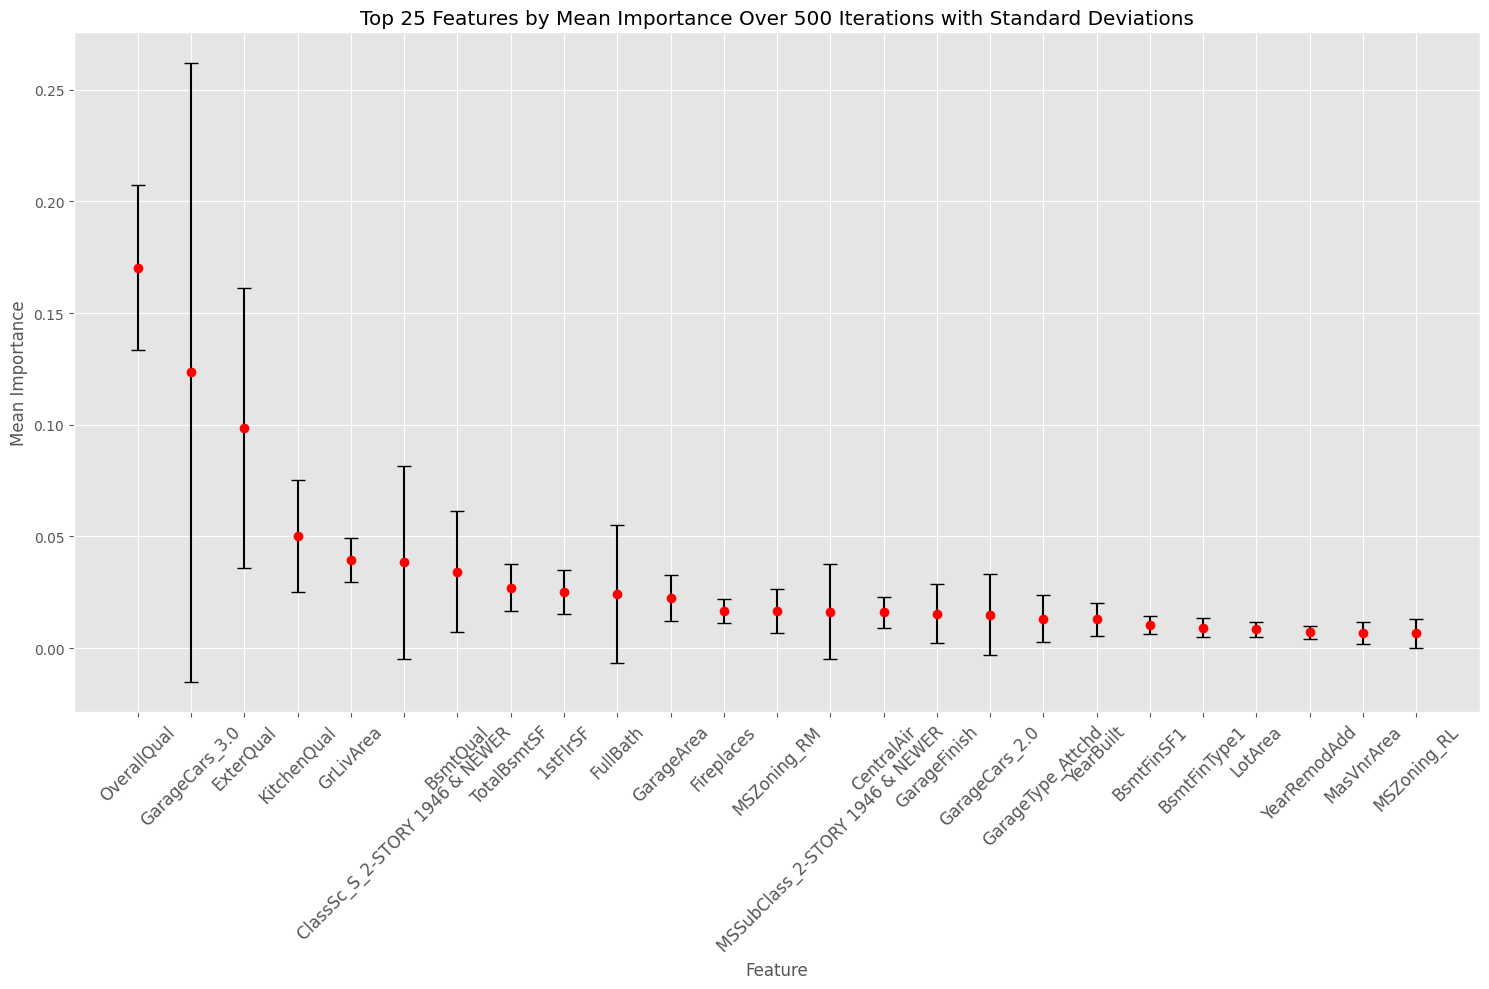

In [65]:
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to compute feature importances on bootstrap samples
def compute_bootstrap_feature_importance(X, y, pipeline):
    # Resample data
    X_sample, y_sample = resample(X, y, replace=True)
    
    # Train on resampled data
    pipeline.fit(X_sample, y_sample)
    
    # Extract trained model
    trained_model = pipeline.named_steps['regressor']
    
    # Get feature importances
    feature_importances = trained_model.feature_importances_
    
    # Get feature names after one-hot encoding
    encoded_features = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
    
    # Get numeric feature names
    numeric_features = X.select_dtypes(exclude=['object']).columns
    
    # Combine feature names
    all_features = np.concatenate([encoded_features, numeric_features])
    
    # Map feature importance to feature names
    return pd.Series(feature_importances, index=all_features)

# Parallel computation of bootstrapped feature importances
n_iterations = 500  # Set to the final number of iterations you want
n_jobs = -1  # Use all available cores

bootstrap_feature_importances = Parallel(n_jobs=n_jobs)(
    delayed(compute_bootstrap_feature_importance)(X_train, y_train, best_xgb_pipeline) for _ in range(n_iterations)
)

# Convert the list of Series to a DataFrame
feature_importances_df = pd.concat(bootstrap_feature_importances, axis=1)

# Compute mean and standard deviation for feature importances
mean_feature_importances = feature_importances_df.mean(axis=1)
std_feature_importances = feature_importances_df.std(axis=1)

# Create a DataFrame with the results
xgb_feature_importance_stats = pd.DataFrame({
    'Feature': mean_feature_importances.index,
    'Mean Importance': mean_feature_importances.values,
    'Std Dev Importance': std_feature_importances.values
})

# Sort the DataFrame by mean importance
xgb_feature_importance_stats.sort_values(by='Mean Importance', ascending=False, inplace=True)

# Plot the top features based on mean importance
top_n = 25  # Number of top features to plot
top_features = xgb_feature_importance_stats.head(top_n)

plt.figure(figsize=(15, 10))
plt.errorbar(x=top_features['Feature'], y=top_features['Mean Importance'], yerr=top_features['Std Dev Importance'], fmt='o', capsize=5, color='red', ecolor='black')
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Mean Importance')
plt.xlabel('Feature')
plt.title(f"Top {top_n} Features by Mean Importance Over {n_iterations} Iterations with Standard Deviations")
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()


In [60]:
xgb_feature_importance_stats

,Feature,Mean Importance,Std Dev Importance
373,OverallQual,0.185765,0.032118
378,ExterQual,0.096751,0.050916
266,GarageCars_3.0,0.089617,0.091137
306,ClassSc_S_2-STORY 1946 & NEWER,0.048736,0.061807
400,KitchenQual,0.047334,0.019774
...,...,...,...
200,GarageYrBlt_1949.0,0.000000,0.000000
203,GarageYrBlt_1952.0,0.000000,0.000000
210,GarageYrBlt_1959.0,0.000000,0.000000
222,GarageYrBlt_1971.0,0.000000,0.000000


[11:39:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


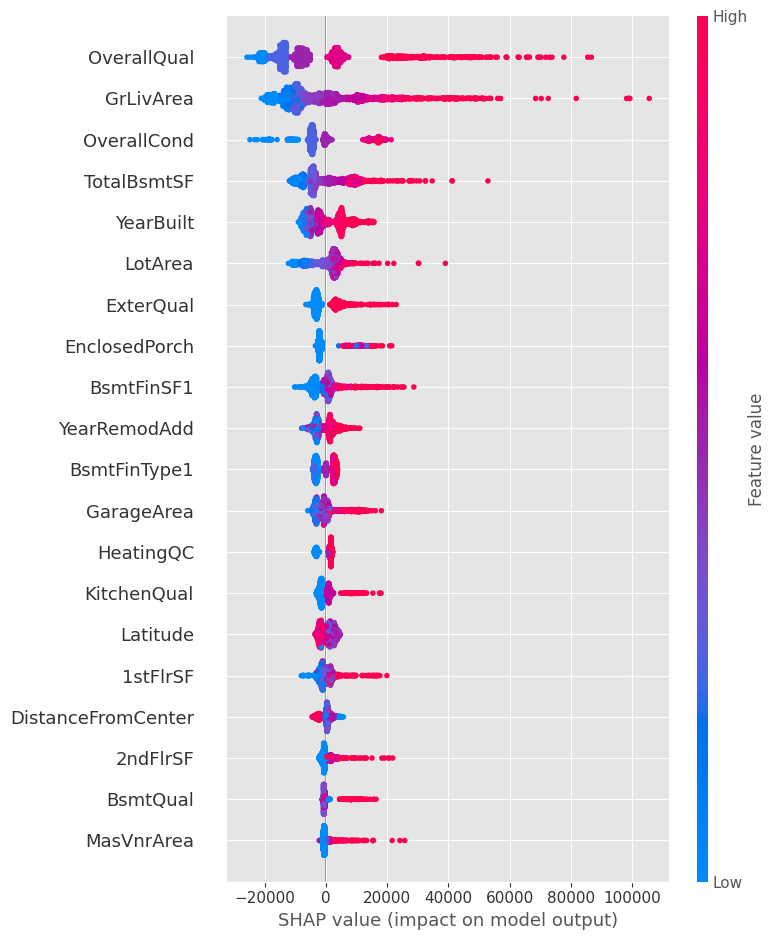

In [53]:
# Replotting SHAP summary plot

# Get XGBoost SHAP values
xgb_model = best_xgb_pipeline.named_steps['regressor']

# Preprocess 
X_train_preprocessed = best_xgb_pipeline.named_steps['preprocessor'].transform(X_train)

# Convert one-hot encoded data to dense format
if isinstance(X_train_preprocessed, scipy.sparse.csr_matrix):
    X_train_preprocessed = X_train_preprocessed.toarray()


encoded_features = best_xgb_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
preprocessed_feature_names = np.concatenate([encoded_features, numeric_features])

# Create SHAP explainer
explainer = shap.Explainer(xgb_model, X_train_preprocessed)

shap_values = explainer(X_train_preprocessed)

shap.summary_plot(shap_values, X_train_preprocessed, feature_names=preprocessed_feature_names)


In [21]:
# Create collective force plot for top 10 most impactful features
import shap

# Create JS visualization code
shap.initjs()

# Calc mean abs SHAP values for each feature
mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)

# Get  indices of  top N features in preprocessed data
top_indices = np.argsort(-mean_abs_shap_values)[:5] 

# Subset SHAP values and feature names to include only  top N features
top_shap_values = shap_values[:, top_indices]
top_feature_names = np.array(preprocessed_feature_names)[top_indices]

# Generate  collective force plot for  top N features for all instances
shap_10_force_plot = shap.force_plot(explainer.expected_value, top_shap_values.values, feature_names=top_feature_names)

# Convert  plot to HTML
# shap_html = shap.save_html("shap_10_force_plot.html", shap_10_force_plot)

Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
[11:40:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


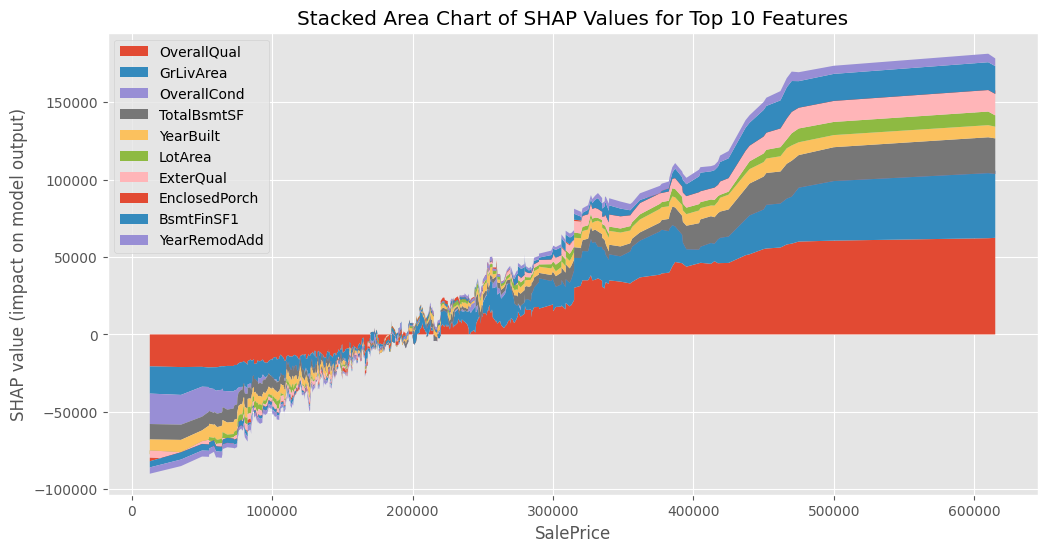

In [54]:
# Create my own collective force plot since SHAP's built-in one is too hard to read with multiple featutrd
import scipy

# Preprocess X_test
X_test_preprocessed = best_xgb_pipeline.named_steps['preprocessor'].transform(X_test)

# Convert to dense array if it's sparse
if isinstance(X_test_preprocessed, scipy.sparse.csr.csr_matrix):
    X_test_preprocessed = X_test_preprocessed.toarray()

# Get preprocessed feature names
encoded_features = best_xgb_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
numeric_features = [col for col in X_test.columns if col not in categorical_features]
preprocessed_feature_names = np.concatenate([encoded_features, numeric_features])

# Create SHAP explainer and calc SHAP values 
explainer = shap.Explainer(xgb_model, X_train_preprocessed)
shap_values = explainer.shap_values(X_test_preprocessed)

# Create a df for SHAP values
shap_df = pd.DataFrame(shap_values, columns=preprocessed_feature_names)

# Add y_test to  df
shap_df['SalePrice'] = y_test.reset_index(drop=True)

# Calc mean abs SHAP values and get top 10 features
mean_abs_shap = np.abs(shap_values).mean(axis=0)
top_features = preprocessed_feature_names[np.argsort(-mean_abs_shap)[:10]]

# Sort df by SalePrice
shap_df_sorted = shap_df.sort_values(by='SalePrice')

# Extract top 10 features SHAP vals
top_shap_values_sorted = shap_df_sorted[top_features]

# Define  size of  rolling window for moving avg
window_size = 10

# Smooth SHAP vals
smood_shap = top_shap_values_sorted.rolling(window=window_size, min_periods=1).mean()

# SalePrice column for x-axis
x_axis_values = shap_df_sorted['SalePrice']

# Plot
plt.figure(figsize=(12, 6))
plt.stackplot(x_axis_values, smood_shap[top_features].T, labels=top_features)
plt.title('Stacked Area Chart of SHAP Values for Top 10 Features')
plt.xlabel('SalePrice')
plt.ylabel('SHAP value (impact on model output)')
plt.legend(loc='upper left')
plt.show()

[11:41:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


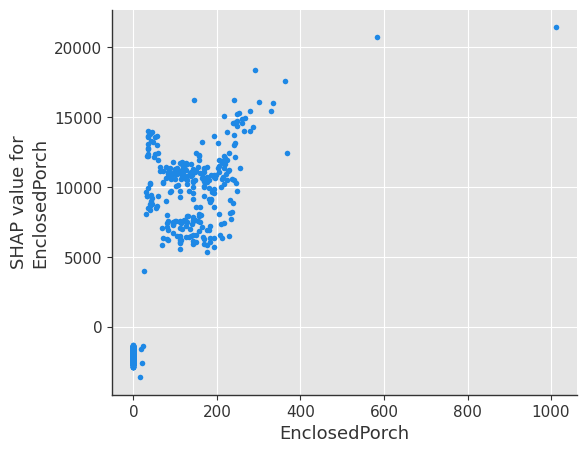

In [55]:
# Cell for SHAP dependence plots - just change feature name and interaction index

# Plot highly interactive pairs of features as dependence plot
import matplotlib.pyplot as plt

# Define feature name
feature_name = 'EnclosedPorch'

# Create SHAP explainer for  model
explainer = shap.Explainer(xgb_model, X_train_preprocessed)

# Calc SHAP values for  feature
shap_values = explainer.shap_values(X_train_preprocessed)

# Generate a dependence plot for feature (and interaction feature)
shap.dependence_plot(feature_name, shap_values, X_train_preprocessed, feature_names=preprocessed_feature_names, interaction_index=None)
